<a href="https://colab.research.google.com/github/dyhwang7/CS4650/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade pandas

In [2]:
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 14.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 18.0 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# WEEK 1: Data Set Up

Select companies that I am personally interested in that have large market share of their respective industries and have stable data to train my model. While I am interested, for the purposes of this study, I excluded companies that experienced abnormal volatility like TSLA, AMC, GME, because they are outliers and would not be a good train data set for the models. From research, it appears like LSTM is often recommended for predicting stock prices so I studied up on that and plan on building that to compare. 

In [4]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
tickers = ['AAPL', 'FB', 'MSFT','V', 'DIS', 'NVDA']
data = []
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2021, 12, 10)

for t in tickers:
  data.append(web.DataReader(t, 'yahoo', start, end))

for i in data:
  print(i)

                  High         Low  ...       Volume   Adj Close
Date                                ...                         
2018-01-02  172.300003  169.259995  ...   25555934.0  168.779877
2018-01-03  174.550003  171.960007  ...   29517899.0  168.750473
2018-01-04  173.470001  172.080002  ...   22434597.0  169.534332
2018-01-05  175.369995  173.050003  ...   23660018.0  171.464508
2018-01-08  175.610001  173.929993  ...   20567766.0  170.827667
...                ...         ...  ...          ...         ...
2021-12-06  167.879898  164.279999  ...  107496982.0  165.320007
2021-12-07  171.580002  168.339996  ...  120405352.0  171.179993
2021-12-08  175.960007  170.699997  ...  116998901.0  175.080002
2021-12-09  176.750000  173.919998  ...  108157647.0  174.559998
2021-12-10  177.429993  174.699997  ...   60266957.0  177.348007

[994 rows x 6 columns]
                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2018-01

I will be using Adj Close as the standard for the daily stock price. Close seems like a better option than Open because Open does not include what happens on that given that obviously, and Adj Close accounts for corporate activity, etc so that it is a more accurate representation of the stock's value.  

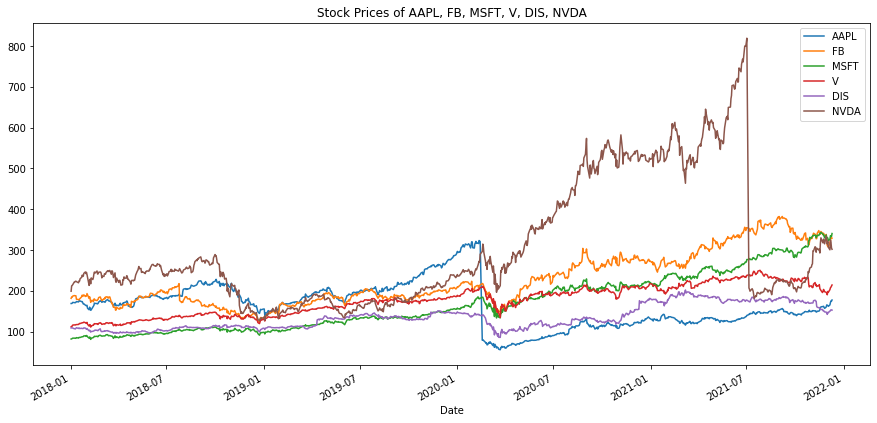

In [6]:
for index, val in enumerate(data):
  val['Adj Close'].plot(label=tickers[index], figsize=(15,7))
plt.title('Stock Prices of ' + ', '.join(tickers))
plt.legend()

# WEEK 2: Basic Stock and Metrics Analysis 

As I am unfamiliar with the basics of stocks, I studied up on various ways of visualizing stocks and metrics that indcate the trends and values of stocks. 

First I start off by plotting the volume of each stock to observe the overall interest and activity of each stock. Here it appears like over the past 3 years, AAPL's volume trumps all the rest with NVDA at second and FB and MSFT fighting for third

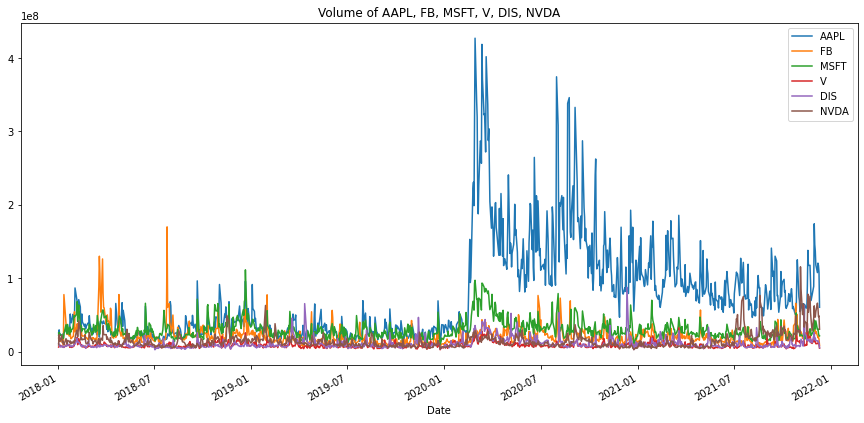

In [7]:
for index, val in enumerate(data):
  val['Volume'].plot(label=tickers[index], figsize=(15,7))
plt.title('Volume of ' + ', '.join(tickers))
plt.legend()

Next, we plot a 6 x 6  scatter matrix of the 6 companies to observe the correlation between the stocks. As expected, tech companies like AAPL, FB, NVDA, and MSFT all seem very positively correlated with each combination forming a straight line. V and DIS do not exhibit a strong correlation with the rest, and DIS especially seems to lack correlation with the rest of the stocks. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f5fdee310>,
      dtype=object)

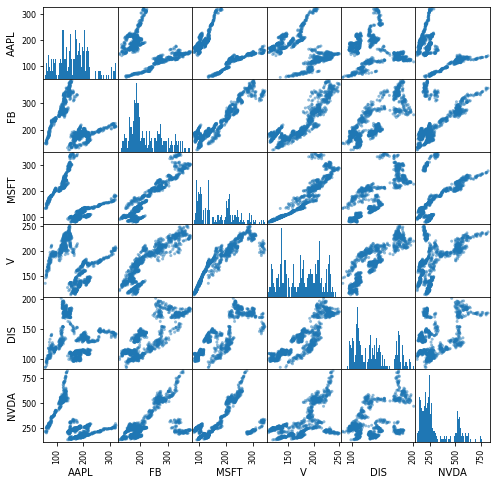

In [8]:
scatter_data = pd.concat([val['Adj Close'] for val in data],axis = 1)
scatter_data.columns = tickers

scatter_matrix(scatter_data, figsize = (8,8), hist_kwds= {'bins':250})

Next we observe the percentage increase in each stock's value throughout the past 3 years. This value is achieved by comparing a given day's price with the previous day's and creating a histogram of the percent difference data. Here Facebook seems to have the highest volatility, an its x range seems to be largest, and AAPL and NVDA appear to be the best performing when looking at positive side vs the negative side

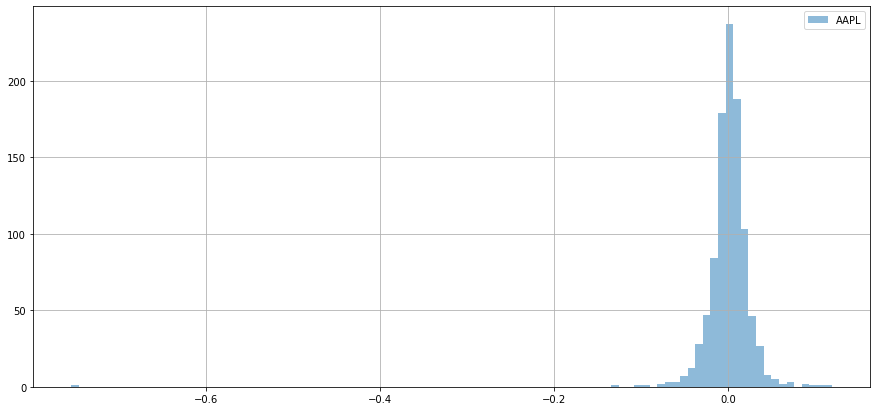

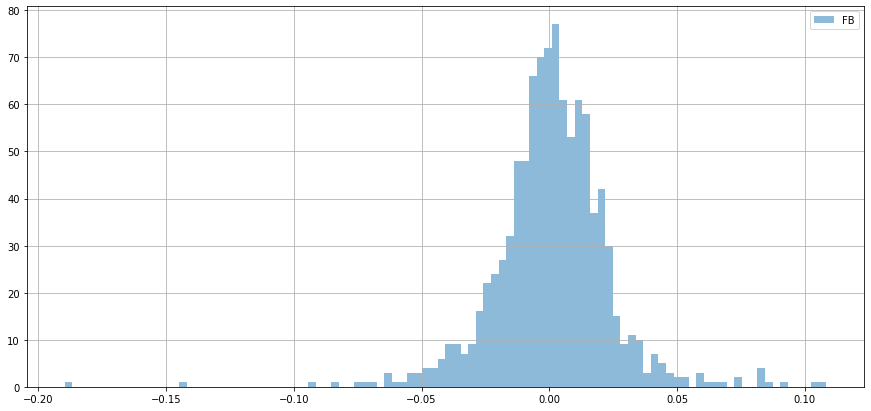

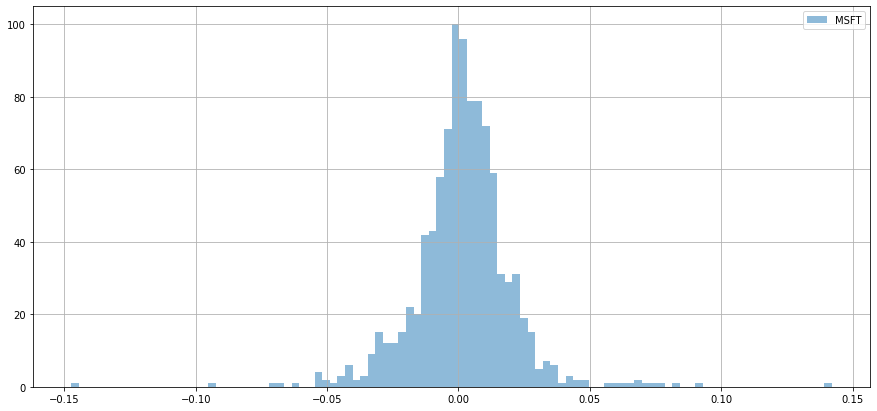

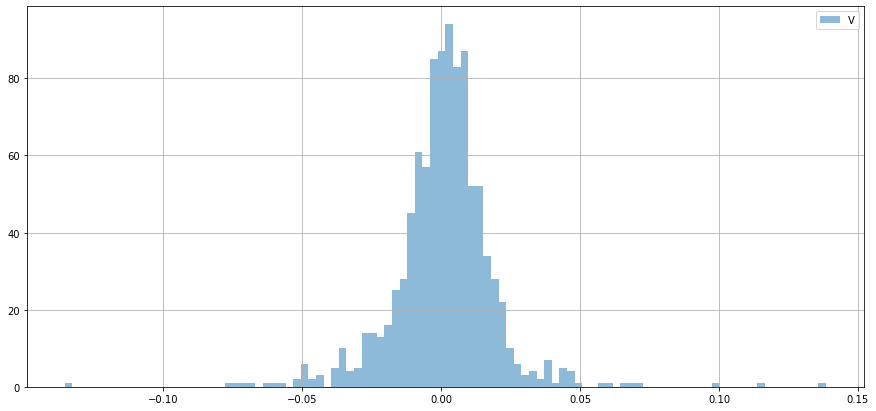

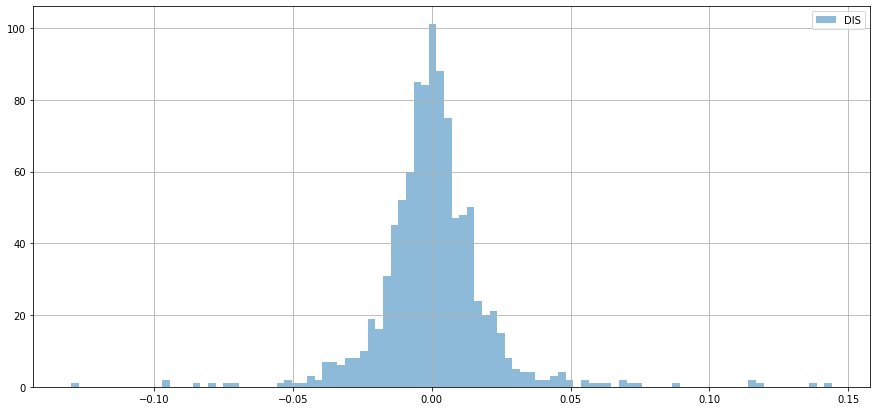

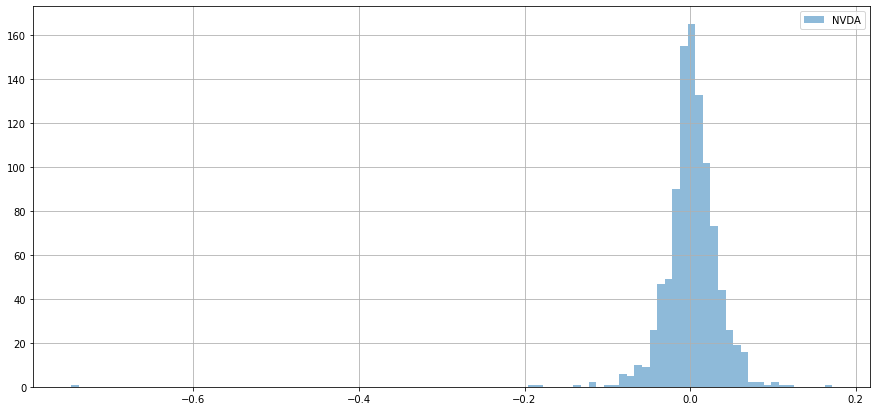

In [9]:
for index, val in enumerate(data):
  returns = (val['Adj Close']/val['Adj Close'].shift(1))-1
  returns.hist(bins = 100, label = tickers[index], alpha = 0.5, figsize = (15,7))
  plt.legend()
  plt.show()

Next we calculate the moving average data for each of the stocks and plot it over the 3 year window to observe trends. Rather than looking at each individual day's stock price, the moving average smoothes the line out by taking a look at the average of previous x number of days for the given day. The blue daily data fluctuates much more than the orange 50 moving average data, and the green 100 moving average data is much more stable than the rest. These provide us with an easy snapshot of the trend of the stock. 

Few interesting observations: When looking at the green data, they mostly rise over the past couple years due to the stock boom that resulted from COVID. Orange lines all trend up as well except for the noticeable dip around 03/2020 when COVID first broke in the US. While most recovered quickly, DIS expectedly took the hardest fall and took the longest to recover

As of recent, FB, V, and DIS seem to trend downward, while AAPL and MSFT are showing a strong positive trend with NVDA trending upward exponentially.

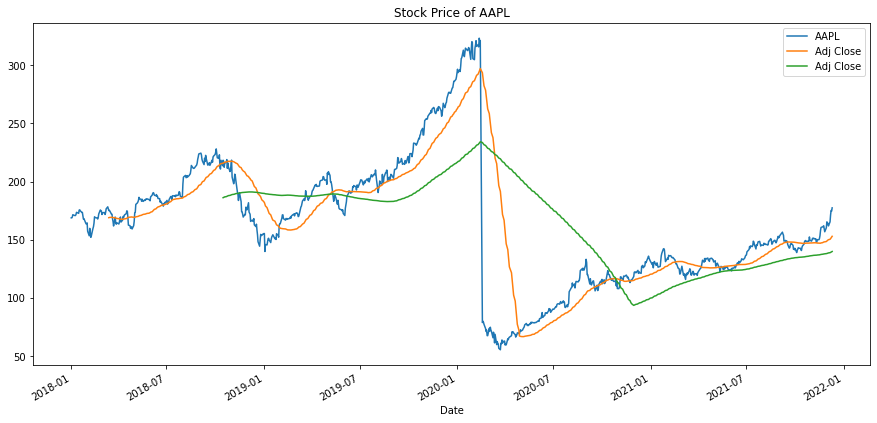

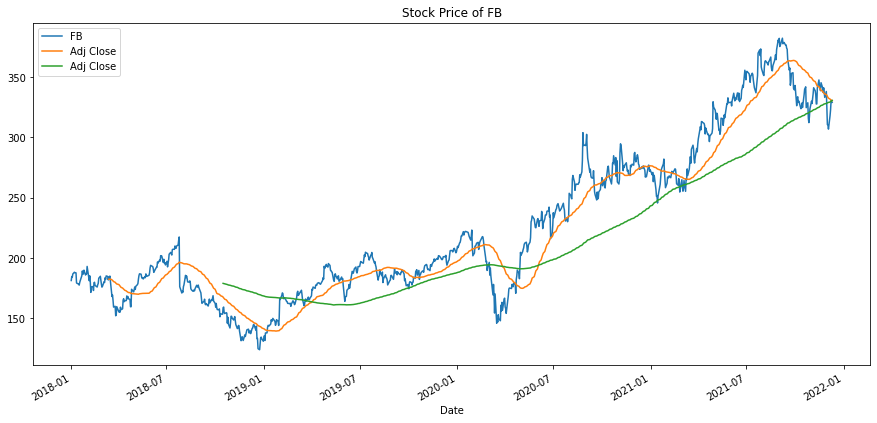

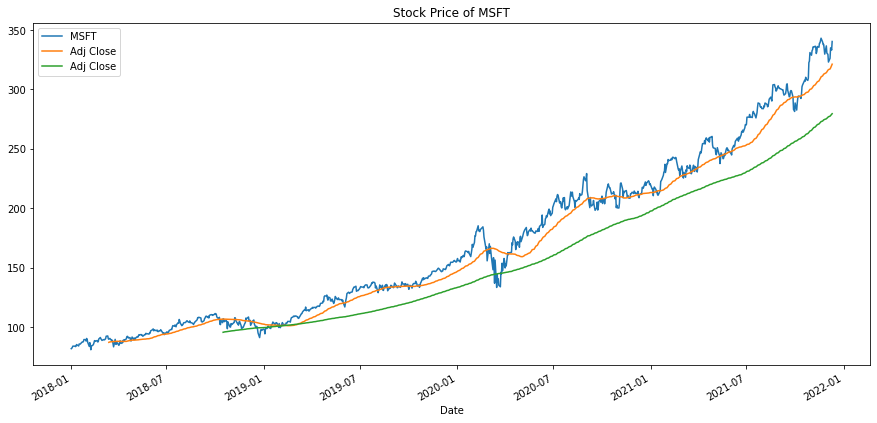

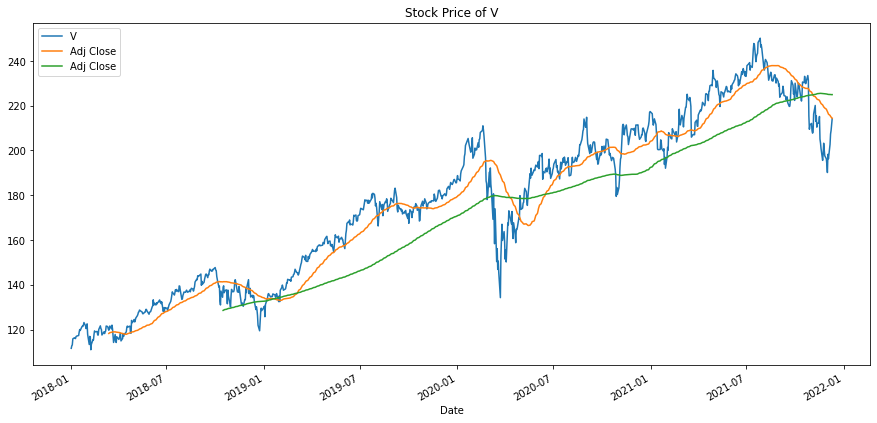

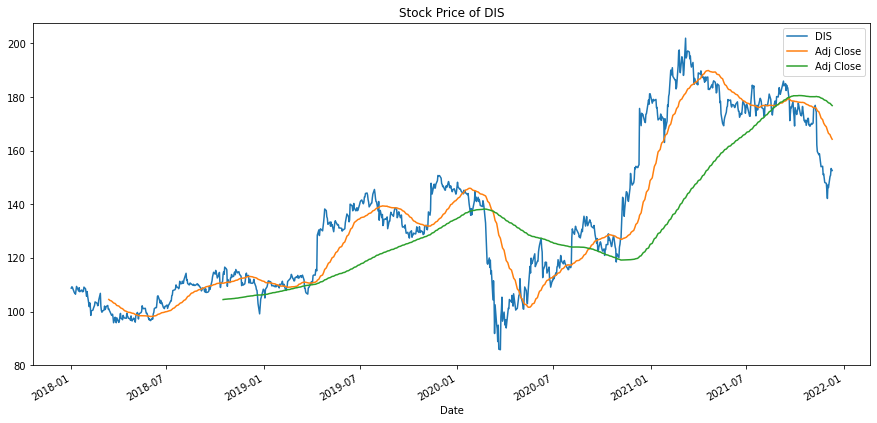

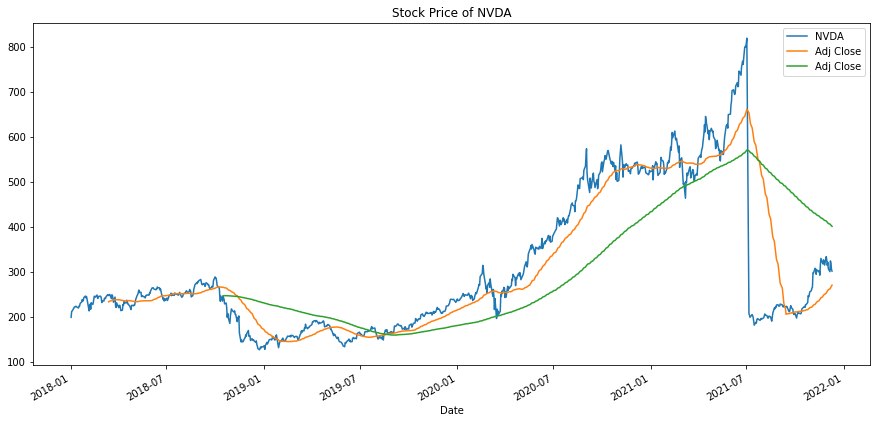

In [10]:
for index, val in enumerate(data):
  rolling_50 = val['Adj Close'].rolling(50).mean()
  rolling_200 = val['Adj Close'].rolling(200).mean()
  val['Adj Close'].plot(label=tickers[index], figsize=(15,7))
  rolling_50.plot()
  rolling_200.plot()
  plt.title('Stock Price of ' + tickers[index])
  plt.legend()
  plt.show()

177.345 5.61
329 13.974
340.34 8.939
214.04 5.627
152.55 1.094
301.43 3.243


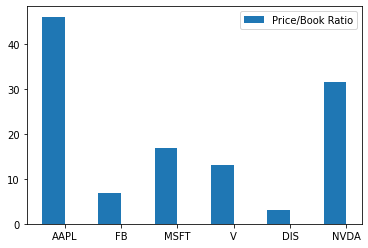

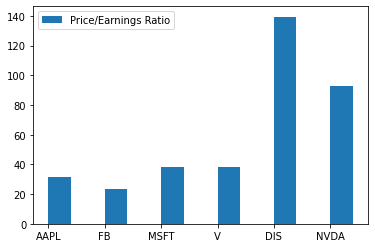

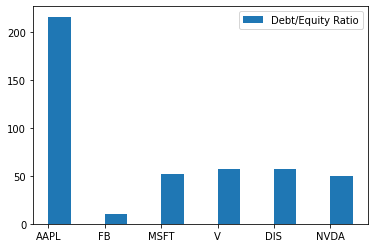

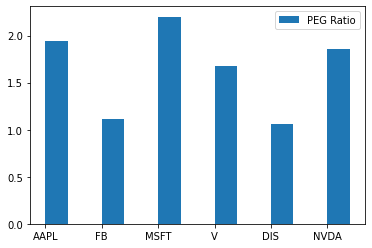

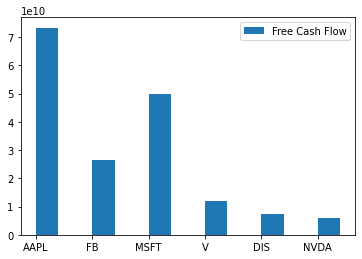

In [11]:
metric_data = []
for t in tickers:
  metric_data.append(yf.Ticker(t))

PB = []
PE = []
DE = []
PEG = []
FCF = []

for i in metric_data:
  PB.append(i.info['priceToBook'])
  print(i.info['regularMarketPrice'], i.info['trailingEps'])
  PE.append(i.info['regularMarketPrice']/i.info['trailingEps'])
  DE.append(i.info['debtToEquity'])
  PEG.append(i.info['pegRatio'])
  FCF.append(i.info['freeCashflow'])

X_axis = np.arange(len(tickers))

plt.bar(X_axis - 0.2, PB, 0.4, label = 'Price/Book Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, PE, 0.4, label = 'Price/Earnings Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, DE, 0.4, label = 'Debt/Equity Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, PEG, 0.4, label = 'PEG Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, FCF, 0.4, label = 'Free Cash Flow')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()


Based on the analysis performed above, AAPL, MSFT, and NVDA seem like they present the 3 best financial metrics, are trending upward, have strong correlation to each other, as a result I will purchase stocks of each for week 2. 

# WEEK 3: Long Short-Term Memory Model

I created a long short-term memory(LSTM) model and ran it for each of the tickers. The data is split approximately 60:40 for training/testing with a 45 day sliding window used to calculate the values for each day. I have tested several values for the number of units per each LSTM layer, the dropout rate used for each dropout layer, along with the number of epochs and the batch sizes. The values predicted are for the next 3 days with each additional predicted value appended to the data to be used for the following day.

This current iteration where prediction_days = 45, # units = 50, dropout rate = 0.15, # epochs = 50, batch size = 16 seems to perform well for AAPL, V, DIS with the RMSE values ranging from 5 - 8 with their corresponding R^2 values at 0.83 to 0.90+. However, for the rest of the stocks, it didn't seem to perform very well with the given set up. I plan on adjusting the respective hyper parameters in the following week to create a better fitting model. 
The 3 tickers that are recommended are also the only 3 that have a net positive change in today's stock value, so perhaps the model is too sensitive to the last few days that it is causing the spike. I will explore how to address this issue as well. 

In [12]:
def stock_prediction(index, data):
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))

  prediction_days = 45
  x_train = []
  y_train = []

  for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.15))
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.15))
  model.add(LSTM(units=50))
  model.add(Dropout(0.15))
  model.add(Dense(units=1))

  model.compile(optimizer='adam', loss='mean_squared_error')
  model.fit(x_train, y_train, epochs=50, batch_size=16)
  test_start = dt.datetime(2020, 1, 1)
  test_end = dt.datetime(2021, 12, 3)

  test_data = web.DataReader(tickers[index], 'yahoo', test_start, test_end)
  actual_prices = test_data['Adj Close'].values

  total_dataset = pd.concat((data['Adj Close'], test_data['Adj Close']), axis=0)
  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
  model_inputs = model_inputs.reshape(-1, 1)
  model_inputs = scaler.transform(model_inputs)

  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])


  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  print('shape ', x_test.shape)

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  forecast_input = test_data['Adj Close'].values.reshape(-1, 1)
  forecast_input = scaler.transform(forecast_input[-prediction_days:])

  for _ in range(3):
    x = forecast_input[-prediction_days:]
    x = x.reshape((1, prediction_days, 1))
    forecast_output = scaler.inverse_transform(model.predict(x))[0][0]
    forecast_input = np.append(forecast_input, forecast_output)
  forecast = forecast_input[prediction_days:]
  forecast = forecast.reshape(-1,1)
  print()
  p = []
  new_predict = []
  for i in predicted_prices:
    p.append(i[0])

  for i in predicted_prices:
    new_predict.append(float(i))

  for j in forecast:
    new_predict.append(float(j))
  rms = mean_squared_error(actual_prices, p, squared=False)
  print(rms)
  r2 = r2_score(actual_prices, p)
  print(r2)
  

  print(new_predict[-1])
  company = tickers[index]
  plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
  plt.plot(predicted_prices, color="orange", label=f"Predicted {company} Price")
  plt.title(f"{company} Share Price")
  plt.xlabel('Time')
  plt.ylabel(f'{company} Share Price')
  plt.legend()
  plt.show()
  return rms, r2, new_predict





  
  # print(actual_prices[-60:])
  # x_input = test_data['Adj Close']
  # x_input = x_input[-60:].values.reshape(-1, 1)
  # x_input = scaler.transform(x_input)
  # print(x_input)
  # print('shape2',x_input.shape)
  # x_input = np.array(x_input)
  # x_input = np.reshape(x_input, (1, 60, 1))
  # yhat = scaler.inverse_transform(model.predict(x_input))
  # print()
  # print(yhat)
  # print(predicted_prices[-1:])
  # real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
  # real_data = np.array(real_data)
  # real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  # print(real_data, len(real_data))

  # prediction = model.predict(real_data)
  # prediction = scaler.inverse_transform(prediction)
  # print(f"Prediction: {prediction}")

In [13]:
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2020, 1, 1)

lstm_result = []
train_data = []

for t in tickers:
  train_data.append(web.DataReader(t, 'yahoo', start, end))

Epoch 1/50
29/29 [==============================] - 7s 62ms/step - loss: 0.0394
Epoch 2/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0091
Epoch 3/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0050
Epoch 4/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0050
Epoch 5/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0053
Epoch 6/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0041
Epoch 7/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0038
Epoch 8/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0042
Epoch 9/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0036
Epoch 10/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0033
Epoch 11/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0036
Epoch 12/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0040
Epoch 13/50
29/29 [==================

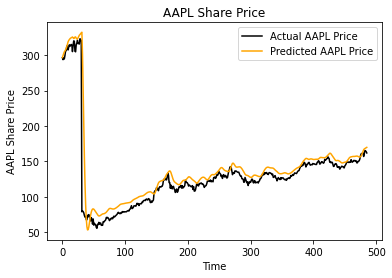

Epoch 1/50
29/29 [==============================] - 7s 62ms/step - loss: 0.0606
Epoch 2/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0172
Epoch 3/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0136
Epoch 4/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0125
Epoch 5/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0115
Epoch 6/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0124
Epoch 7/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0119
Epoch 8/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0101
Epoch 9/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0101
Epoch 10/50
29/29 [==============================] - 2s 64ms/step - loss: 0.0092
Epoch 11/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0088
Epoch 12/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0088
Epoch 13/50
29/29 [==================

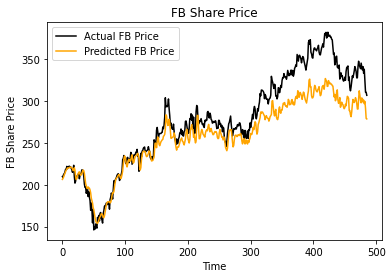

Epoch 1/50
29/29 [==============================] - 6s 59ms/step - loss: 0.0396
Epoch 2/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0056
Epoch 3/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0041
Epoch 4/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0045
Epoch 5/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0033
Epoch 6/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0035
Epoch 7/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0037
Epoch 8/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0034
Epoch 9/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0037
Epoch 10/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0034
Epoch 11/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0036
Epoch 12/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0035
Epoch 13/50
29/29 [==================

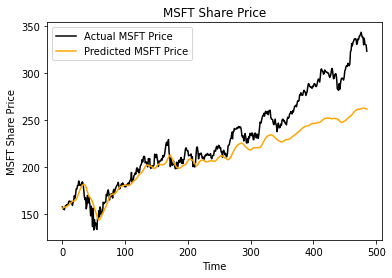

Epoch 1/50
29/29 [==============================] - 6s 60ms/step - loss: 0.0359
Epoch 2/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0060
Epoch 3/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0050
Epoch 4/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0056
Epoch 5/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0052
Epoch 6/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0052
Epoch 7/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0048
Epoch 8/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0042
Epoch 9/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0042
Epoch 10/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0045
Epoch 11/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0054
Epoch 12/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0047
Epoch 13/50
29/29 [==================

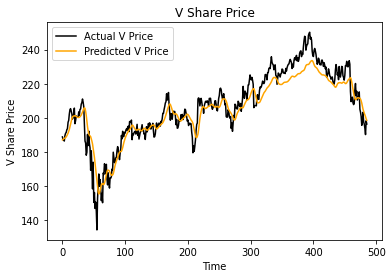

Epoch 1/50
29/29 [==============================] - 7s 62ms/step - loss: 0.0465
Epoch 2/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0101
Epoch 3/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0089
Epoch 4/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0089
Epoch 5/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0101
Epoch 6/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0087
Epoch 7/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0073
Epoch 8/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0080
Epoch 9/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0072
Epoch 10/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0065
Epoch 11/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0065
Epoch 12/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0062
Epoch 13/50
29/29 [==================

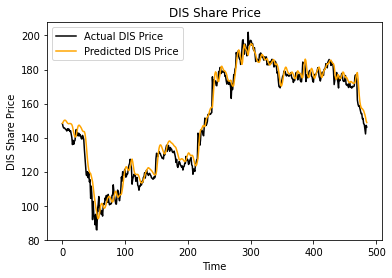

Epoch 1/50
29/29 [==============================] - 7s 63ms/step - loss: 0.0523
Epoch 2/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0134
Epoch 3/50
29/29 [==============================] - 2s 64ms/step - loss: 0.0110
Epoch 4/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0094
Epoch 5/50
29/29 [==============================] - 2s 64ms/step - loss: 0.0088
Epoch 6/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0085
Epoch 7/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0093
Epoch 8/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0086
Epoch 9/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0097
Epoch 10/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0087
Epoch 11/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0074
Epoch 12/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0081
Epoch 13/50
29/29 [==================

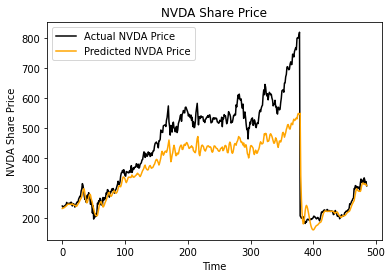

RMSE:20.745090338286605	R2:0.8522494074576147	last actual:167.49945068359375	weekly prediction: 457.6760559082031	projected profit/stock: 290.1766052246094
RMSE:25.152740496865164	R2:0.8032582269681432	last actual:296.8334655761719	weekly prediction: 481.4958190917969	projected profit/stock: 184.662353515625
RMSE:27.759360121272422	R2:0.6841672313188976	last actual:262.3868713378906	weekly prediction: 271.20428466796875	projected profit/stock: 8.817413330078125
RMSE:7.565790889005487	R2:0.8671263996556619	last actual:202.69898986816406	weekly prediction: 256.6269836425781	projected profit/stock: 53.92799377441406
RMSE:4.968708382308354	R2:0.9724654652745247	last actual:154.70941162109375	weekly prediction: 278.713623046875	projected profit/stock: 124.00421142578125
RMSE:88.28195862460373	R2:0.688388082719018	last actual:311.7864990234375	weekly prediction: 668.2417602539062	projected profit/stock: 356.45526123046875


In [14]:
for index, val in enumerate(train_data):
  r1, r2, f = stock_prediction(index, val)
  lstm_result.append([r1, r2, f])

for i in lstm_result:
  print('RMSE:{}\tR2:{}\tlast actual:{}\tweekly prediction: {}\tprojected profit/stock: {}'.format(i[0], i[1], i[2][-8], i[2][-1], i[2][-1]-i[2][-8]))

While the spike does seem unusual, for this week I will go with what is recommended by the model and purchase the 3 highest recommendations in FB, V, DIS 

# WEEK 4: Improve Long Short-Term Memory Model and Compare with Monte Carlo Simulation

I continued developing the LSTM model created last week and ran a grid search for each of the tickers to find the most optimal parameters, namely the size of the window used in the LSTM model along with the batch sizes. 

Furthermore, I first calculated the change in the daily return and visualized it using a histogram. Then for each ticker, I iterated through and ran a Monte Carlo Simulation using the following formula

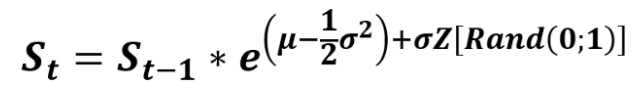

It shows that for each stock price of today, we look at yesterday's price times a certain daily return, which is calculated using the Brownian Motion. It uses an exponential function of e raised to the power of the drift + volatility to calculate the daily return.

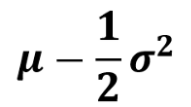

This portion of the exponent is called the drift - which is basically the expected return of the stock from the past

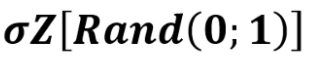

This portion is the volatility where the historical volatility is multiplied by a random noramlized variable to add variability to the data. When ran multiple times, this will ensure the spread in the paths of our simulations. 

# Grid search for the LSTM model

In [15]:
def stock_prediction_2(index, data, days, b_size):
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))

  prediction_days = days
  x_train = []
  y_train = []

  for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.15))
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.15))
  model.add(LSTM(units=50))
  model.add(Dropout(0.15))
  model.add(Dense(units=1))

  model.compile(optimizer='adam', loss='mean_squared_error')
  model.fit(x_train, y_train, epochs=25, batch_size=b_size)
  test_start = dt.datetime(2020, 1, 1)
  test_end = dt.datetime(2021, 12, 10)

  test_data = web.DataReader(tickers[index], 'yahoo', test_start, test_end)
  actual_prices = test_data['Adj Close'].values

  total_dataset = pd.concat((data['Adj Close'], test_data['Adj Close']), axis=0)
  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
  model_inputs = model_inputs.reshape(-1, 1)
  model_inputs = scaler.transform(model_inputs)

  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])


  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  print('shape ', x_test.shape)

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  forecast_input = test_data['Adj Close'].values.reshape(-1, 1)
  forecast_input = scaler.transform(forecast_input[-prediction_days:])

  for _ in range(1):
    x = forecast_input[-prediction_days:]
    x = x.reshape((1, prediction_days, 1))
    forecast_output = scaler.inverse_transform(model.predict(x))[0][0]
    forecast_input = np.append(forecast_input, forecast_output)
  forecast = forecast_input[prediction_days:]
  forecast = forecast.reshape(-1,1)
  print()
  p = []
  new_predict = []
  for i in predicted_prices:
    p.append(i[0])

  for i in predicted_prices:
    new_predict.append(float(i))

  for j in forecast:
    new_predict.append(float(j))
  rms = mean_squared_error(actual_prices, p, squared=False)
  print(rms)
  r2 = r2_score(actual_prices, p)
  print(r2)
  

  print(new_predict[-1])
  company = tickers[index]
  plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
  plt.plot(predicted_prices, color="orange", label=f"Predicted {company} Price")
  plt.title(f"{company} Share Price")
  plt.xlabel('Time')
  plt.ylabel(f'{company} Share Price')
  plt.legend()
  plt.show()
  return rms, r2, new_predict[-1], actual_prices[-1]





  
  # print(actual_prices[-60:])
  # x_input = test_data['Adj Close']
  # x_input = x_input[-60:].values.reshape(-1, 1)
  # x_input = scaler.transform(x_input)
  # print(x_input)
  # print('shape2',x_input.shape)
  # x_input = np.array(x_input)
  # x_input = np.reshape(x_input, (1, 60, 1))
  # yhat = scaler.inverse_transform(model.predict(x_input))
  # print()
  # print(yhat)
  # print(predicted_prices[-1:])
  # real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
  # real_data = np.array(real_data)
  # real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  # print(real_data, len(real_data))

  # prediction = model.predict(real_data)
  # prediction = scaler.inverse_transform(prediction)
  # print(f"Prediction: {prediction}")

Epoch 1/25
61/61 [==============================] - 5s 15ms/step - loss: 0.0211
Epoch 2/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0052
Epoch 3/25
61/61 [==============================] - 1s 14ms/step - loss: 0.0049
Epoch 4/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0060
Epoch 5/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0044
Epoch 6/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0043
Epoch 7/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0040
Epoch 8/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0034
Epoch 9/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0040
Epoch 10/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0034
Epoch 11/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0039
Epoch 12/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0030
Epoch 13/25
61/61 [==================

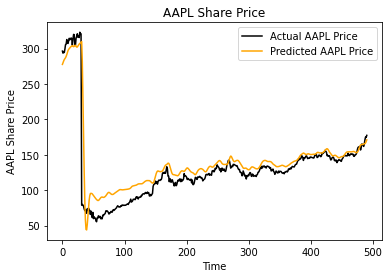

Epoch 1/25
31/31 [==============================] - 5s 23ms/step - loss: 0.0345
Epoch 2/25
31/31 [==============================] - 1s 23ms/step - loss: 0.0065
Epoch 3/25
31/31 [==============================] - 1s 22ms/step - loss: 0.0052
Epoch 4/25
31/31 [==============================] - 1s 23ms/step - loss: 0.0048
Epoch 5/25
31/31 [==============================] - 1s 22ms/step - loss: 0.0048
Epoch 6/25
31/31 [==============================] - 1s 22ms/step - loss: 0.0043
Epoch 7/25
31/31 [==============================] - 1s 23ms/step - loss: 0.0047
Epoch 8/25
31/31 [==============================] - 1s 22ms/step - loss: 0.0041
Epoch 9/25
31/31 [==============================] - 1s 22ms/step - loss: 0.0044
Epoch 10/25
31/31 [==============================] - 1s 23ms/step - loss: 0.0038
Epoch 11/25
31/31 [==============================] - 1s 22ms/step - loss: 0.0038
Epoch 12/25
31/31 [==============================] - 1s 22ms/step - loss: 0.0038
Epoch 13/25
31/31 [==================

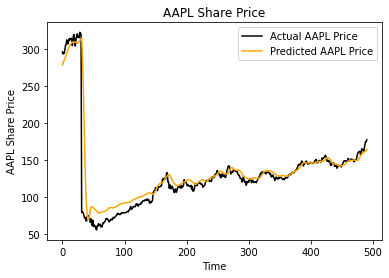

Epoch 1/25
21/21 [==============================] - 6s 23ms/step - loss: 0.0490
Epoch 2/25
21/21 [==============================] - 1s 24ms/step - loss: 0.0073
Epoch 3/25
21/21 [==============================] - 1s 25ms/step - loss: 0.0048
Epoch 4/25
21/21 [==============================] - 1s 24ms/step - loss: 0.0051
Epoch 5/25
21/21 [==============================] - 0s 24ms/step - loss: 0.0048
Epoch 6/25
21/21 [==============================] - 1s 25ms/step - loss: 0.0044
Epoch 7/25
21/21 [==============================] - 1s 25ms/step - loss: 0.0043
Epoch 8/25
21/21 [==============================] - 1s 24ms/step - loss: 0.0040
Epoch 9/25
21/21 [==============================] - 1s 24ms/step - loss: 0.0041
Epoch 10/25
21/21 [==============================] - 1s 25ms/step - loss: 0.0038
Epoch 11/25
21/21 [==============================] - 1s 25ms/step - loss: 0.0039
Epoch 12/25
21/21 [==============================] - 1s 24ms/step - loss: 0.0037
Epoch 13/25
21/21 [==================

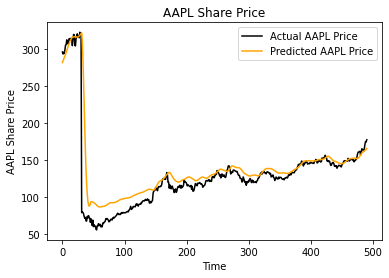

Epoch 1/25
16/16 [==============================] - 5s 25ms/step - loss: 0.0471
Epoch 2/25
16/16 [==============================] - 0s 27ms/step - loss: 0.0132
Epoch 3/25
16/16 [==============================] - 0s 27ms/step - loss: 0.0056
Epoch 4/25
16/16 [==============================] - 0s 25ms/step - loss: 0.0050
Epoch 5/25
16/16 [==============================] - 0s 25ms/step - loss: 0.0049
Epoch 6/25
16/16 [==============================] - 0s 27ms/step - loss: 0.0052
Epoch 7/25
16/16 [==============================] - 0s 26ms/step - loss: 0.0049
Epoch 8/25
16/16 [==============================] - 0s 27ms/step - loss: 0.0050
Epoch 9/25
16/16 [==============================] - 0s 26ms/step - loss: 0.0046
Epoch 10/25
16/16 [==============================] - 0s 25ms/step - loss: 0.0054
Epoch 11/25
16/16 [==============================] - 0s 27ms/step - loss: 0.0051
Epoch 12/25
16/16 [==============================] - 0s 27ms/step - loss: 0.0043
Epoch 13/25
16/16 [==================

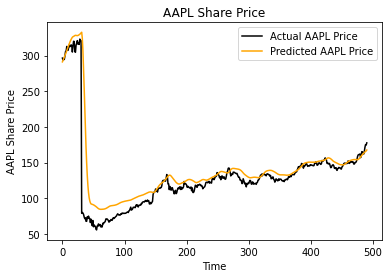

Epoch 1/25
60/60 [==============================] - 7s 38ms/step - loss: 0.0143
Epoch 2/25
60/60 [==============================] - 2s 38ms/step - loss: 0.0051
Epoch 3/25
60/60 [==============================] - 2s 38ms/step - loss: 0.0055
Epoch 4/25
60/60 [==============================] - 2s 38ms/step - loss: 0.0048
Epoch 5/25
60/60 [==============================] - 2s 38ms/step - loss: 0.0045
Epoch 6/25
60/60 [==============================] - 2s 38ms/step - loss: 0.0041
Epoch 7/25
60/60 [==============================] - 2s 37ms/step - loss: 0.0031
Epoch 8/25
60/60 [==============================] - 2s 38ms/step - loss: 0.0030
Epoch 9/25
60/60 [==============================] - 2s 38ms/step - loss: 0.0037
Epoch 10/25
60/60 [==============================] - 2s 37ms/step - loss: 0.0030
Epoch 11/25
60/60 [==============================] - 2s 38ms/step - loss: 0.0028
Epoch 12/25
60/60 [==============================] - 2s 38ms/step - loss: 0.0033
Epoch 13/25
60/60 [==================

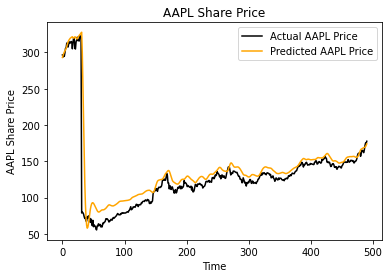

Epoch 1/25
30/30 [==============================] - 7s 41ms/step - loss: 0.0278
Epoch 2/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0059
Epoch 3/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0053
Epoch 4/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0047
Epoch 5/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0051
Epoch 6/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0053
Epoch 7/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0041
Epoch 8/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0041
Epoch 9/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0037
Epoch 10/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0036
Epoch 11/25
30/30 [==============================] - 1s 41ms/step - loss: 0.0033
Epoch 12/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0030
Epoch 13/25
30/30 [==================

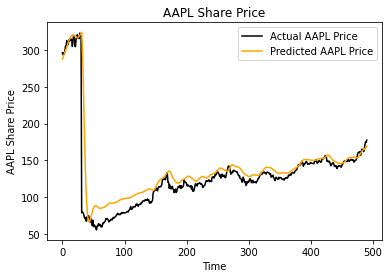

Epoch 1/25
20/20 [==============================] - 5s 43ms/step - loss: 0.0395
Epoch 2/25
20/20 [==============================] - 1s 44ms/step - loss: 0.0097
Epoch 3/25
20/20 [==============================] - 1s 44ms/step - loss: 0.0058
Epoch 4/25
20/20 [==============================] - 1s 44ms/step - loss: 0.0053
Epoch 5/25
20/20 [==============================] - 1s 43ms/step - loss: 0.0050
Epoch 6/25
20/20 [==============================] - 1s 44ms/step - loss: 0.0045
Epoch 7/25
20/20 [==============================] - 1s 44ms/step - loss: 0.0043
Epoch 8/25
20/20 [==============================] - 1s 45ms/step - loss: 0.0047
Epoch 9/25
20/20 [==============================] - 1s 43ms/step - loss: 0.0058
Epoch 10/25
20/20 [==============================] - 1s 44ms/step - loss: 0.0043
Epoch 11/25
20/20 [==============================] - 1s 43ms/step - loss: 0.0037
Epoch 12/25
20/20 [==============================] - 1s 44ms/step - loss: 0.0041
Epoch 13/25
20/20 [==================

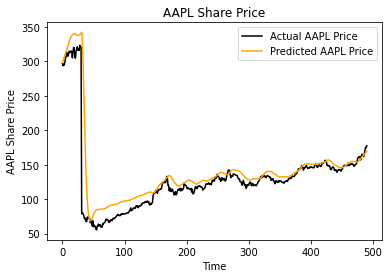

Epoch 1/25
15/15 [==============================] - 6s 46ms/step - loss: 0.0504
Epoch 2/25
15/15 [==============================] - 1s 45ms/step - loss: 0.0143
Epoch 3/25
15/15 [==============================] - 1s 46ms/step - loss: 0.0085
Epoch 4/25
15/15 [==============================] - 1s 47ms/step - loss: 0.0063
Epoch 5/25
15/15 [==============================] - 1s 48ms/step - loss: 0.0061
Epoch 6/25
15/15 [==============================] - 1s 45ms/step - loss: 0.0048
Epoch 7/25
15/15 [==============================] - 1s 46ms/step - loss: 0.0046
Epoch 8/25
15/15 [==============================] - 1s 47ms/step - loss: 0.0041
Epoch 9/25
15/15 [==============================] - 1s 45ms/step - loss: 0.0046
Epoch 10/25
15/15 [==============================] - 1s 47ms/step - loss: 0.0044
Epoch 11/25
15/15 [==============================] - 1s 45ms/step - loss: 0.0042
Epoch 12/25
15/15 [==============================] - 1s 45ms/step - loss: 0.0041
Epoch 13/25
15/15 [==================

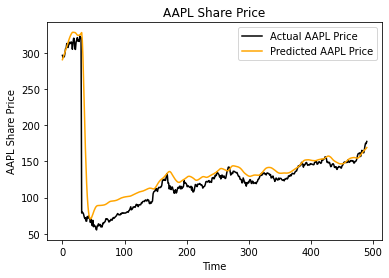

Epoch 1/25
58/58 [==============================] - 8s 58ms/step - loss: 0.0175
Epoch 2/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0057
Epoch 3/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0045
Epoch 4/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0045
Epoch 5/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0046
Epoch 6/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0061
Epoch 7/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0040
Epoch 8/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0035
Epoch 9/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0037
Epoch 10/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0032
Epoch 11/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0034
Epoch 12/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0034
Epoch 13/25
58/58 [==================

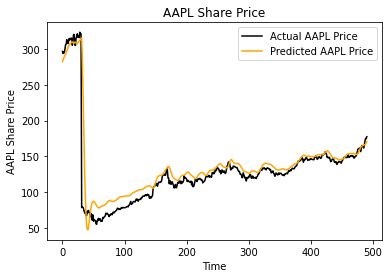

Epoch 1/25
29/29 [==============================] - 6s 63ms/step - loss: 0.0345
Epoch 2/25
29/29 [==============================] - 2s 62ms/step - loss: 0.0068
Epoch 3/25
29/29 [==============================] - 2s 62ms/step - loss: 0.0056
Epoch 4/25
29/29 [==============================] - 2s 62ms/step - loss: 0.0049
Epoch 5/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0049
Epoch 6/25
29/29 [==============================] - 2s 62ms/step - loss: 0.0048
Epoch 7/25
29/29 [==============================] - 2s 62ms/step - loss: 0.0049
Epoch 8/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0039
Epoch 9/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0039
Epoch 10/25
29/29 [==============================] - 2s 61ms/step - loss: 0.0037
Epoch 11/25
29/29 [==============================] - 2s 62ms/step - loss: 0.0032
Epoch 12/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0037
Epoch 13/25
29/29 [==================

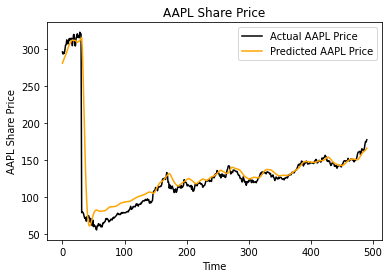

Epoch 1/25
20/20 [==============================] - 7s 65ms/step - loss: 0.0460
Epoch 2/25
20/20 [==============================] - 1s 66ms/step - loss: 0.0095
Epoch 3/25
20/20 [==============================] - 1s 66ms/step - loss: 0.0100
Epoch 4/25
20/20 [==============================] - 1s 65ms/step - loss: 0.0055
Epoch 5/25
20/20 [==============================] - 1s 65ms/step - loss: 0.0052
Epoch 6/25
20/20 [==============================] - 1s 68ms/step - loss: 0.0051
Epoch 7/25
20/20 [==============================] - 1s 65ms/step - loss: 0.0045
Epoch 8/25
20/20 [==============================] - 1s 66ms/step - loss: 0.0037
Epoch 9/25
20/20 [==============================] - 1s 66ms/step - loss: 0.0039
Epoch 10/25
20/20 [==============================] - 1s 65ms/step - loss: 0.0037
Epoch 11/25
20/20 [==============================] - 1s 67ms/step - loss: 0.0038
Epoch 12/25
20/20 [==============================] - 1s 66ms/step - loss: 0.0034
Epoch 13/25
20/20 [==================

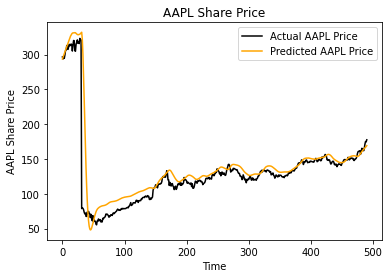

Epoch 1/25
15/15 [==============================] - 6s 72ms/step - loss: 0.0568
Epoch 2/25
15/15 [==============================] - 1s 70ms/step - loss: 0.0130
Epoch 3/25
15/15 [==============================] - 1s 71ms/step - loss: 0.0077
Epoch 4/25
15/15 [==============================] - 1s 70ms/step - loss: 0.0060
Epoch 5/25
15/15 [==============================] - 1s 72ms/step - loss: 0.0053
Epoch 6/25
15/15 [==============================] - 1s 73ms/step - loss: 0.0054
Epoch 7/25
15/15 [==============================] - 1s 71ms/step - loss: 0.0053
Epoch 8/25
15/15 [==============================] - 1s 72ms/step - loss: 0.0044
Epoch 9/25
15/15 [==============================] - 1s 72ms/step - loss: 0.0045
Epoch 10/25
15/15 [==============================] - 1s 70ms/step - loss: 0.0048
Epoch 11/25
15/15 [==============================] - 1s 71ms/step - loss: 0.0050
Epoch 12/25
15/15 [==============================] - 1s 69ms/step - loss: 0.0040
Epoch 13/25
15/15 [==================

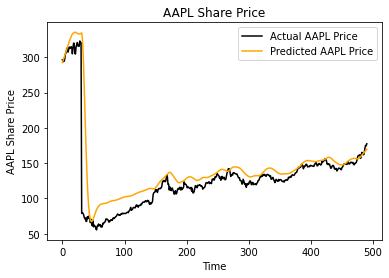

Epoch 1/25
61/61 [==============================] - 5s 16ms/step - loss: 0.0405
Epoch 2/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0138
Epoch 3/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0118
Epoch 4/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0105
Epoch 5/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0102
Epoch 6/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0093
Epoch 7/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0097
Epoch 8/25
61/61 [==============================] - 1s 17ms/step - loss: 0.0085
Epoch 9/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0090
Epoch 10/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0077
Epoch 11/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0062
Epoch 12/25
61/61 [==============================] - 1s 17ms/step - loss: 0.0072
Epoch 13/25
61/61 [==================

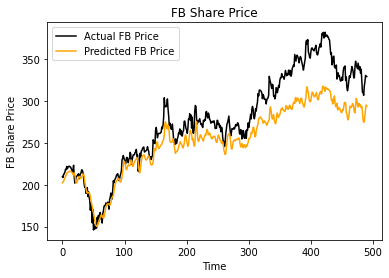

Epoch 1/25
31/31 [==============================] - 5s 24ms/step - loss: 0.0688
Epoch 2/25
31/31 [==============================] - 1s 26ms/step - loss: 0.0167
Epoch 3/25
31/31 [==============================] - 1s 23ms/step - loss: 0.0122
Epoch 4/25
31/31 [==============================] - 1s 23ms/step - loss: 0.0121
Epoch 5/25
31/31 [==============================] - 1s 24ms/step - loss: 0.0116
Epoch 6/25
31/31 [==============================] - 1s 23ms/step - loss: 0.0109
Epoch 7/25
31/31 [==============================] - 1s 25ms/step - loss: 0.0106
Epoch 8/25
31/31 [==============================] - 1s 24ms/step - loss: 0.0107
Epoch 9/25
31/31 [==============================] - 1s 23ms/step - loss: 0.0111
Epoch 10/25
31/31 [==============================] - 1s 23ms/step - loss: 0.0111
Epoch 11/25
31/31 [==============================] - 1s 25ms/step - loss: 0.0100
Epoch 12/25
31/31 [==============================] - 1s 25ms/step - loss: 0.0093
Epoch 13/25
31/31 [==================

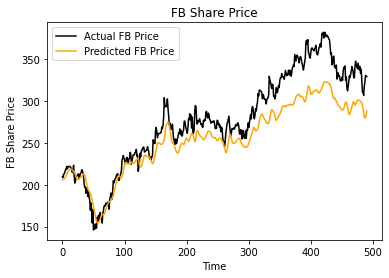

Epoch 1/25
21/21 [==============================] - 6s 25ms/step - loss: 0.0923
Epoch 2/25
21/21 [==============================] - 1s 27ms/step - loss: 0.0164
Epoch 3/25
21/21 [==============================] - 1s 26ms/step - loss: 0.0119
Epoch 4/25
21/21 [==============================] - 1s 27ms/step - loss: 0.0108
Epoch 5/25
21/21 [==============================] - 1s 27ms/step - loss: 0.0118
Epoch 6/25
21/21 [==============================] - 1s 26ms/step - loss: 0.0103
Epoch 7/25
21/21 [==============================] - 1s 27ms/step - loss: 0.0126
Epoch 8/25
21/21 [==============================] - 1s 26ms/step - loss: 0.0108
Epoch 9/25
21/21 [==============================] - 1s 26ms/step - loss: 0.0100
Epoch 10/25
21/21 [==============================] - 1s 25ms/step - loss: 0.0114
Epoch 11/25
21/21 [==============================] - 1s 26ms/step - loss: 0.0107
Epoch 12/25
21/21 [==============================] - 1s 25ms/step - loss: 0.0090
Epoch 13/25
21/21 [==================

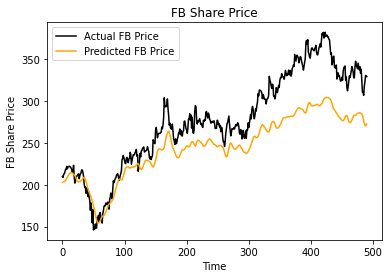

Epoch 1/25
16/16 [==============================] - 5s 28ms/step - loss: 0.1223
Epoch 2/25
16/16 [==============================] - 0s 28ms/step - loss: 0.0227
Epoch 3/25
16/16 [==============================] - 0s 28ms/step - loss: 0.0175
Epoch 4/25
16/16 [==============================] - 0s 29ms/step - loss: 0.0150
Epoch 5/25
16/16 [==============================] - 0s 28ms/step - loss: 0.0120
Epoch 6/25
16/16 [==============================] - 0s 28ms/step - loss: 0.0123
Epoch 7/25
16/16 [==============================] - 0s 27ms/step - loss: 0.0112
Epoch 8/25
16/16 [==============================] - 0s 29ms/step - loss: 0.0119
Epoch 9/25
16/16 [==============================] - 0s 27ms/step - loss: 0.0117
Epoch 10/25
16/16 [==============================] - 0s 29ms/step - loss: 0.0119
Epoch 11/25
16/16 [==============================] - 0s 28ms/step - loss: 0.0107
Epoch 12/25
16/16 [==============================] - 0s 29ms/step - loss: 0.0107
Epoch 13/25
16/16 [==================

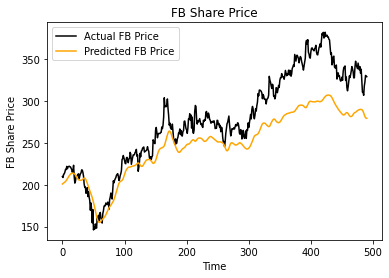

Epoch 1/25
60/60 [==============================] - 7s 39ms/step - loss: 0.0372
Epoch 2/25
60/60 [==============================] - 2s 39ms/step - loss: 0.0124
Epoch 3/25
60/60 [==============================] - 2s 39ms/step - loss: 0.0120
Epoch 4/25
60/60 [==============================] - 2s 39ms/step - loss: 0.0110
Epoch 5/25
60/60 [==============================] - 2s 39ms/step - loss: 0.0106
Epoch 6/25
60/60 [==============================] - 2s 39ms/step - loss: 0.0088
Epoch 7/25
60/60 [==============================] - 2s 40ms/step - loss: 0.0097
Epoch 8/25
60/60 [==============================] - 2s 40ms/step - loss: 0.0076
Epoch 9/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0093
Epoch 10/25
60/60 [==============================] - 2s 40ms/step - loss: 0.0080
Epoch 11/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0070
Epoch 12/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0080
Epoch 13/25
60/60 [==================

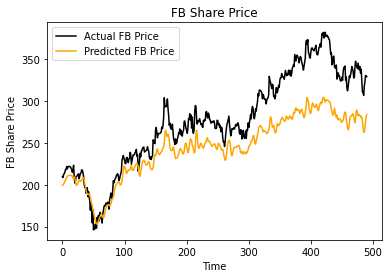

Epoch 1/25
30/30 [==============================] - 7s 41ms/step - loss: 0.0620
Epoch 2/25
30/30 [==============================] - 1s 44ms/step - loss: 0.0153
Epoch 3/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0122
Epoch 4/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0117
Epoch 5/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0102
Epoch 6/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0102
Epoch 7/25
30/30 [==============================] - 1s 44ms/step - loss: 0.0099
Epoch 8/25
30/30 [==============================] - 1s 44ms/step - loss: 0.0105
Epoch 9/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0098
Epoch 10/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0091
Epoch 11/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0092
Epoch 12/25
30/30 [==============================] - 1s 44ms/step - loss: 0.0091
Epoch 13/25
30/30 [==================

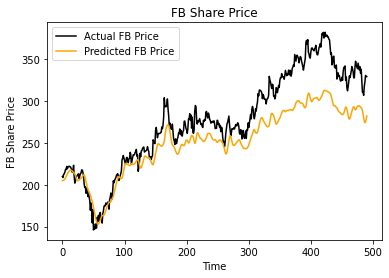

Epoch 1/25
20/20 [==============================] - 6s 45ms/step - loss: 0.0898
Epoch 2/25
20/20 [==============================] - 1s 48ms/step - loss: 0.0161
Epoch 3/25
20/20 [==============================] - 1s 48ms/step - loss: 0.0143
Epoch 4/25
20/20 [==============================] - 1s 48ms/step - loss: 0.0131
Epoch 5/25
20/20 [==============================] - 1s 48ms/step - loss: 0.0117
Epoch 6/25
20/20 [==============================] - 1s 47ms/step - loss: 0.0117
Epoch 7/25
20/20 [==============================] - 1s 45ms/step - loss: 0.0119
Epoch 8/25
20/20 [==============================] - 1s 48ms/step - loss: 0.0107
Epoch 9/25
20/20 [==============================] - 1s 47ms/step - loss: 0.0096
Epoch 10/25
20/20 [==============================] - 1s 46ms/step - loss: 0.0112
Epoch 11/25
20/20 [==============================] - 1s 49ms/step - loss: 0.0103
Epoch 12/25
20/20 [==============================] - 1s 46ms/step - loss: 0.0097
Epoch 13/25
20/20 [==================

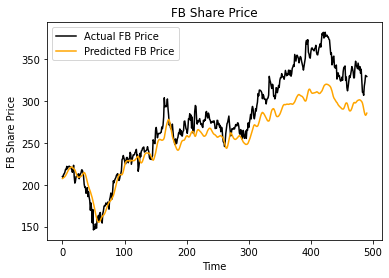

Epoch 1/25
15/15 [==============================] - 6s 51ms/step - loss: 0.0925
Epoch 2/25
15/15 [==============================] - 1s 48ms/step - loss: 0.0232
Epoch 3/25
15/15 [==============================] - 1s 48ms/step - loss: 0.0156
Epoch 4/25
15/15 [==============================] - 1s 49ms/step - loss: 0.0127
Epoch 5/25
15/15 [==============================] - 1s 47ms/step - loss: 0.0133
Epoch 6/25
15/15 [==============================] - 1s 52ms/step - loss: 0.0117
Epoch 7/25
15/15 [==============================] - 1s 46ms/step - loss: 0.0127
Epoch 8/25
15/15 [==============================] - 1s 46ms/step - loss: 0.0108
Epoch 9/25
15/15 [==============================] - 1s 47ms/step - loss: 0.0095
Epoch 10/25
15/15 [==============================] - 1s 49ms/step - loss: 0.0102
Epoch 11/25
15/15 [==============================] - 1s 48ms/step - loss: 0.0102
Epoch 12/25
15/15 [==============================] - 1s 51ms/step - loss: 0.0103
Epoch 13/25
15/15 [==================

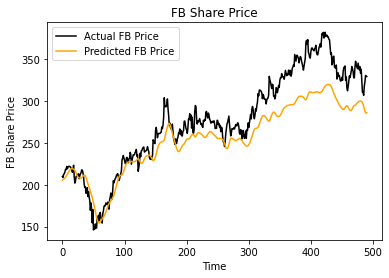

Epoch 1/25
58/58 [==============================] - 8s 61ms/step - loss: 0.0411
Epoch 2/25
58/58 [==============================] - 3s 60ms/step - loss: 0.0130
Epoch 3/25
58/58 [==============================] - 3s 60ms/step - loss: 0.0105
Epoch 4/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0101
Epoch 5/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0110
Epoch 6/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0100
Epoch 7/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0092
Epoch 8/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0085
Epoch 9/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0082
Epoch 10/25
58/58 [==============================] - 3s 60ms/step - loss: 0.0084
Epoch 11/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0086
Epoch 12/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0083
Epoch 13/25
58/58 [==================

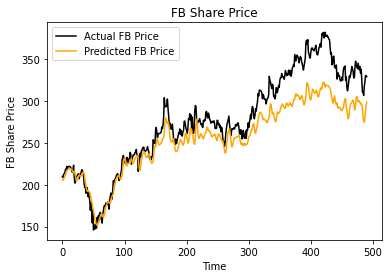

Epoch 1/25
29/29 [==============================] - 7s 67ms/step - loss: 0.0588
Epoch 2/25
29/29 [==============================] - 2s 67ms/step - loss: 0.0159
Epoch 3/25
29/29 [==============================] - 2s 66ms/step - loss: 0.0123
Epoch 4/25
29/29 [==============================] - 2s 66ms/step - loss: 0.0119
Epoch 5/25
29/29 [==============================] - 2s 66ms/step - loss: 0.0111
Epoch 6/25
29/29 [==============================] - 2s 65ms/step - loss: 0.0101
Epoch 7/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0098
Epoch 8/25
29/29 [==============================] - 2s 66ms/step - loss: 0.0094
Epoch 9/25
29/29 [==============================] - 2s 66ms/step - loss: 0.0097
Epoch 10/25
29/29 [==============================] - 2s 69ms/step - loss: 0.0095
Epoch 11/25
29/29 [==============================] - 2s 67ms/step - loss: 0.0092
Epoch 12/25
29/29 [==============================] - 2s 65ms/step - loss: 0.0100
Epoch 13/25
29/29 [==================

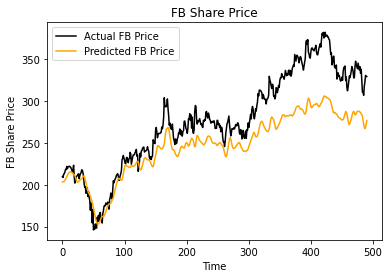

Epoch 1/25
20/20 [==============================] - 7s 67ms/step - loss: 0.0788
Epoch 2/25
20/20 [==============================] - 1s 70ms/step - loss: 0.0170
Epoch 3/25
20/20 [==============================] - 1s 70ms/step - loss: 0.0149
Epoch 4/25
20/20 [==============================] - 1s 70ms/step - loss: 0.0122
Epoch 5/25
20/20 [==============================] - 1s 69ms/step - loss: 0.0115
Epoch 6/25
20/20 [==============================] - 1s 67ms/step - loss: 0.0102
Epoch 7/25
20/20 [==============================] - 1s 65ms/step - loss: 0.0108
Epoch 8/25
20/20 [==============================] - 1s 68ms/step - loss: 0.0100
Epoch 9/25
20/20 [==============================] - 1s 69ms/step - loss: 0.0100
Epoch 10/25
20/20 [==============================] - 1s 67ms/step - loss: 0.0099
Epoch 11/25
20/20 [==============================] - 1s 68ms/step - loss: 0.0106
Epoch 12/25
20/20 [==============================] - 1s 67ms/step - loss: 0.0101
Epoch 13/25
20/20 [==================

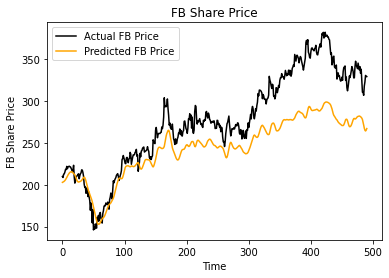

Epoch 1/25
15/15 [==============================] - 6s 77ms/step - loss: 0.0934
Epoch 2/25
15/15 [==============================] - 1s 73ms/step - loss: 0.0235
Epoch 3/25
15/15 [==============================] - 1s 75ms/step - loss: 0.0166
Epoch 4/25
15/15 [==============================] - 1s 74ms/step - loss: 0.0161
Epoch 5/25
15/15 [==============================] - 1s 73ms/step - loss: 0.0146
Epoch 6/25
15/15 [==============================] - 1s 73ms/step - loss: 0.0121
Epoch 7/25
15/15 [==============================] - 1s 75ms/step - loss: 0.0128
Epoch 8/25
15/15 [==============================] - 1s 74ms/step - loss: 0.0116
Epoch 9/25
15/15 [==============================] - 1s 74ms/step - loss: 0.0106
Epoch 10/25
15/15 [==============================] - 1s 75ms/step - loss: 0.0102
Epoch 11/25
15/15 [==============================] - 1s 72ms/step - loss: 0.0100
Epoch 12/25
15/15 [==============================] - 1s 72ms/step - loss: 0.0097
Epoch 13/25
15/15 [==================

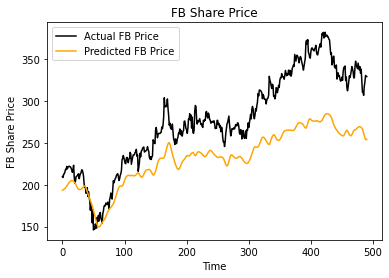

Epoch 1/25
61/61 [==============================] - 6s 18ms/step - loss: 0.0224
Epoch 2/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0044
Epoch 3/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0039
Epoch 4/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0032
Epoch 5/25
61/61 [==============================] - 1s 19ms/step - loss: 0.0035
Epoch 6/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0030
Epoch 7/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0032
Epoch 8/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0032
Epoch 9/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0030
Epoch 10/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0036
Epoch 11/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0031
Epoch 12/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 13/25
61/61 [==================

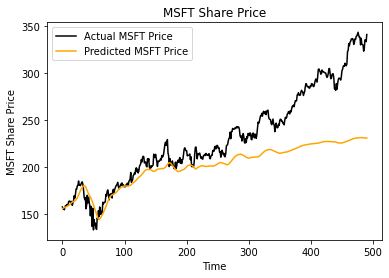

Epoch 1/25
31/31 [==============================] - 5s 25ms/step - loss: 0.0301
Epoch 2/25
31/31 [==============================] - 1s 26ms/step - loss: 0.0048
Epoch 3/25
31/31 [==============================] - 1s 26ms/step - loss: 0.0043
Epoch 4/25
31/31 [==============================] - 1s 25ms/step - loss: 0.0037
Epoch 5/25
31/31 [==============================] - 1s 26ms/step - loss: 0.0038
Epoch 6/25
31/31 [==============================] - 1s 26ms/step - loss: 0.0031
Epoch 7/25
31/31 [==============================] - 1s 25ms/step - loss: 0.0038
Epoch 8/25
31/31 [==============================] - 1s 27ms/step - loss: 0.0038
Epoch 9/25
31/31 [==============================] - 1s 27ms/step - loss: 0.0030
Epoch 10/25
31/31 [==============================] - 1s 25ms/step - loss: 0.0030
Epoch 11/25
31/31 [==============================] - 1s 27ms/step - loss: 0.0040
Epoch 12/25
31/31 [==============================] - 1s 27ms/step - loss: 0.0028
Epoch 13/25
31/31 [==================

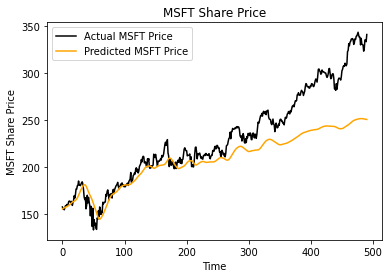

Epoch 1/25
21/21 [==============================] - 6s 28ms/step - loss: 0.0599
Epoch 2/25
21/21 [==============================] - 1s 28ms/step - loss: 0.0091
Epoch 3/25
21/21 [==============================] - 1s 29ms/step - loss: 0.0038
Epoch 4/25
21/21 [==============================] - 1s 28ms/step - loss: 0.0032
Epoch 5/25
21/21 [==============================] - 1s 30ms/step - loss: 0.0036
Epoch 6/25
21/21 [==============================] - 1s 28ms/step - loss: 0.0038
Epoch 7/25
21/21 [==============================] - 1s 28ms/step - loss: 0.0031
Epoch 8/25
21/21 [==============================] - 1s 29ms/step - loss: 0.0034
Epoch 9/25
21/21 [==============================] - 1s 29ms/step - loss: 0.0030
Epoch 10/25
21/21 [==============================] - 1s 30ms/step - loss: 0.0031
Epoch 11/25
21/21 [==============================] - 1s 30ms/step - loss: 0.0031
Epoch 12/25
21/21 [==============================] - 1s 29ms/step - loss: 0.0038
Epoch 13/25
21/21 [==================

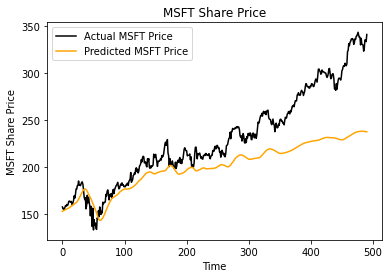

Epoch 1/25
16/16 [==============================] - 5s 29ms/step - loss: 0.0704
Epoch 2/25
16/16 [==============================] - 0s 30ms/step - loss: 0.0136
Epoch 3/25
16/16 [==============================] - 0s 30ms/step - loss: 0.0050
Epoch 4/25
16/16 [==============================] - 0s 30ms/step - loss: 0.0042
Epoch 5/25
16/16 [==============================] - 0s 30ms/step - loss: 0.0035
Epoch 6/25
16/16 [==============================] - 0s 29ms/step - loss: 0.0033
Epoch 7/25
16/16 [==============================] - 0s 29ms/step - loss: 0.0033
Epoch 8/25
16/16 [==============================] - 0s 30ms/step - loss: 0.0034
Epoch 9/25
16/16 [==============================] - 0s 30ms/step - loss: 0.0033
Epoch 10/25
16/16 [==============================] - 0s 30ms/step - loss: 0.0035
Epoch 11/25
16/16 [==============================] - 0s 30ms/step - loss: 0.0030
Epoch 12/25
16/16 [==============================] - 0s 28ms/step - loss: 0.0031
Epoch 13/25
16/16 [==================

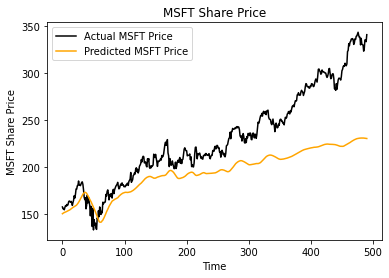

Epoch 1/25
60/60 [==============================] - 7s 41ms/step - loss: 0.0249
Epoch 2/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0039
Epoch 3/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0037
Epoch 4/25
60/60 [==============================] - 3s 42ms/step - loss: 0.0066
Epoch 5/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0031
Epoch 6/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0039
Epoch 7/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0030
Epoch 8/25
60/60 [==============================] - 3s 42ms/step - loss: 0.0030
Epoch 9/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0039
Epoch 10/25
60/60 [==============================] - 3s 42ms/step - loss: 0.0025
Epoch 11/25
60/60 [==============================] - 2s 40ms/step - loss: 0.0030
Epoch 12/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0031
Epoch 13/25
60/60 [==================

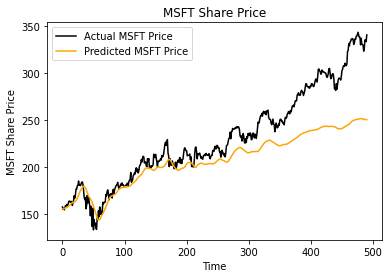

Epoch 1/25
30/30 [==============================] - 7s 46ms/step - loss: 0.0444
Epoch 2/25
30/30 [==============================] - 1s 46ms/step - loss: 0.0050
Epoch 3/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0053
Epoch 4/25
30/30 [==============================] - 1s 44ms/step - loss: 0.0045
Epoch 5/25
30/30 [==============================] - 1s 45ms/step - loss: 0.0039
Epoch 6/25
30/30 [==============================] - 1s 44ms/step - loss: 0.0038
Epoch 7/25
30/30 [==============================] - 1s 47ms/step - loss: 0.0037
Epoch 8/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0032
Epoch 9/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0033
Epoch 10/25
30/30 [==============================] - 1s 47ms/step - loss: 0.0035
Epoch 11/25
30/30 [==============================] - 1s 45ms/step - loss: 0.0033
Epoch 12/25
30/30 [==============================] - 1s 44ms/step - loss: 0.0033
Epoch 13/25
30/30 [==================

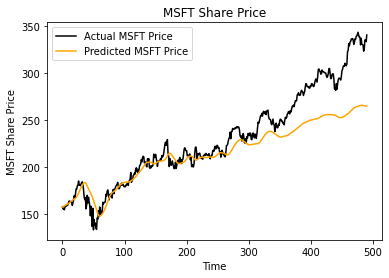

Epoch 1/25
20/20 [==============================] - 6s 49ms/step - loss: 0.0510
Epoch 2/25
20/20 [==============================] - 1s 51ms/step - loss: 0.0071
Epoch 3/25
20/20 [==============================] - 1s 51ms/step - loss: 0.0037
Epoch 4/25
20/20 [==============================] - 1s 46ms/step - loss: 0.0036
Epoch 5/25
20/20 [==============================] - 1s 48ms/step - loss: 0.0038
Epoch 6/25
20/20 [==============================] - 1s 50ms/step - loss: 0.0035
Epoch 7/25
20/20 [==============================] - 1s 46ms/step - loss: 0.0029
Epoch 8/25
20/20 [==============================] - 1s 48ms/step - loss: 0.0038
Epoch 9/25
20/20 [==============================] - 1s 49ms/step - loss: 0.0035
Epoch 10/25
20/20 [==============================] - 1s 49ms/step - loss: 0.0037
Epoch 11/25
20/20 [==============================] - 1s 54ms/step - loss: 0.0037
Epoch 12/25
20/20 [==============================] - 1s 51ms/step - loss: 0.0033
Epoch 13/25
20/20 [==================

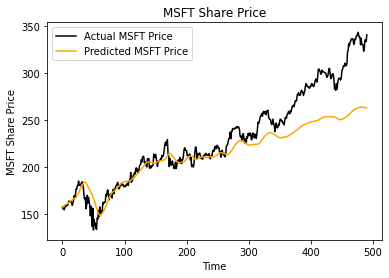

Epoch 1/25
15/15 [==============================] - 6s 48ms/step - loss: 0.0760
Epoch 2/25
15/15 [==============================] - 1s 48ms/step - loss: 0.0126
Epoch 3/25
15/15 [==============================] - 1s 50ms/step - loss: 0.0054
Epoch 4/25
15/15 [==============================] - 1s 51ms/step - loss: 0.0040
Epoch 5/25
15/15 [==============================] - 1s 50ms/step - loss: 0.0037
Epoch 6/25
15/15 [==============================] - 1s 56ms/step - loss: 0.0040
Epoch 7/25
15/15 [==============================] - 1s 53ms/step - loss: 0.0039
Epoch 8/25
15/15 [==============================] - 1s 53ms/step - loss: 0.0035
Epoch 9/25
15/15 [==============================] - 1s 56ms/step - loss: 0.0037
Epoch 10/25
15/15 [==============================] - 1s 51ms/step - loss: 0.0030
Epoch 11/25
15/15 [==============================] - 1s 56ms/step - loss: 0.0032
Epoch 12/25
15/15 [==============================] - 1s 55ms/step - loss: 0.0032
Epoch 13/25
15/15 [==================

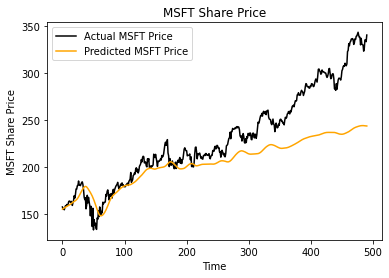

Epoch 1/25
58/58 [==============================] - 8s 60ms/step - loss: 0.0246
Epoch 2/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0059
Epoch 3/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0042
Epoch 4/25
58/58 [==============================] - 3s 60ms/step - loss: 0.0041
Epoch 5/25
58/58 [==============================] - 4s 61ms/step - loss: 0.0043
Epoch 6/25
58/58 [==============================] - 4s 62ms/step - loss: 0.0037
Epoch 7/25
58/58 [==============================] - 4s 62ms/step - loss: 0.0033
Epoch 8/25
58/58 [==============================] - 4s 62ms/step - loss: 0.0035
Epoch 9/25
58/58 [==============================] - 4s 61ms/step - loss: 0.0037
Epoch 10/25
58/58 [==============================] - 4s 62ms/step - loss: 0.0032
Epoch 11/25
58/58 [==============================] - 4s 61ms/step - loss: 0.0040
Epoch 12/25
58/58 [==============================] - 3s 60ms/step - loss: 0.0032
Epoch 13/25
58/58 [==================

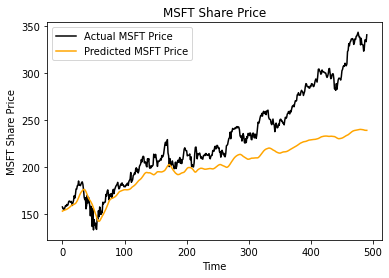

Epoch 1/25
29/29 [==============================] - 7s 66ms/step - loss: 0.0303
Epoch 2/25
29/29 [==============================] - 2s 66ms/step - loss: 0.0047
Epoch 3/25
29/29 [==============================] - 2s 66ms/step - loss: 0.0044
Epoch 4/25
29/29 [==============================] - 2s 66ms/step - loss: 0.0039
Epoch 5/25
29/29 [==============================] - 2s 67ms/step - loss: 0.0037
Epoch 6/25
29/29 [==============================] - 2s 67ms/step - loss: 0.0036
Epoch 7/25
29/29 [==============================] - 2s 64ms/step - loss: 0.0037
Epoch 8/25
29/29 [==============================] - 2s 64ms/step - loss: 0.0039
Epoch 9/25
29/29 [==============================] - 2s 65ms/step - loss: 0.0039
Epoch 10/25
29/29 [==============================] - 2s 64ms/step - loss: 0.0034
Epoch 11/25
29/29 [==============================] - 2s 67ms/step - loss: 0.0034
Epoch 12/25
29/29 [==============================] - 2s 67ms/step - loss: 0.0029
Epoch 13/25
29/29 [==================

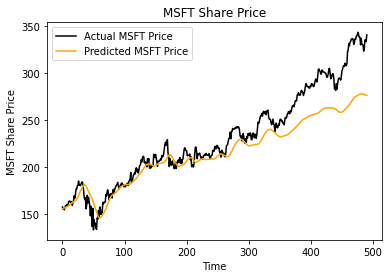

Epoch 1/25
20/20 [==============================] - 7s 70ms/step - loss: 0.0545
Epoch 2/25
20/20 [==============================] - 1s 69ms/step - loss: 0.0066
Epoch 3/25
20/20 [==============================] - 1s 68ms/step - loss: 0.0054
Epoch 4/25
20/20 [==============================] - 1s 67ms/step - loss: 0.0046
Epoch 5/25
20/20 [==============================] - 1s 69ms/step - loss: 0.0052
Epoch 6/25
20/20 [==============================] - 1s 71ms/step - loss: 0.0042
Epoch 7/25
20/20 [==============================] - 1s 72ms/step - loss: 0.0032
Epoch 8/25
20/20 [==============================] - 1s 69ms/step - loss: 0.0031
Epoch 9/25
20/20 [==============================] - 1s 70ms/step - loss: 0.0034
Epoch 10/25
20/20 [==============================] - 1s 70ms/step - loss: 0.0034
Epoch 11/25
20/20 [==============================] - 1s 70ms/step - loss: 0.0030
Epoch 12/25
20/20 [==============================] - 1s 70ms/step - loss: 0.0030
Epoch 13/25
20/20 [==================

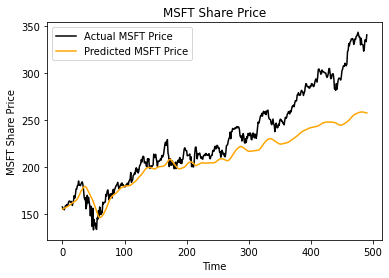

Epoch 1/25
15/15 [==============================] - 6s 76ms/step - loss: 0.0559
Epoch 2/25
15/15 [==============================] - 1s 76ms/step - loss: 0.0105
Epoch 3/25
15/15 [==============================] - 1s 75ms/step - loss: 0.0046
Epoch 4/25
15/15 [==============================] - 1s 76ms/step - loss: 0.0041
Epoch 5/25
15/15 [==============================] - 1s 75ms/step - loss: 0.0047
Epoch 6/25
15/15 [==============================] - 1s 76ms/step - loss: 0.0037
Epoch 7/25
15/15 [==============================] - 1s 75ms/step - loss: 0.0041
Epoch 8/25
15/15 [==============================] - 1s 74ms/step - loss: 0.0040
Epoch 9/25
15/15 [==============================] - 1s 72ms/step - loss: 0.0041
Epoch 10/25
15/15 [==============================] - 1s 75ms/step - loss: 0.0032
Epoch 11/25
15/15 [==============================] - 1s 73ms/step - loss: 0.0038
Epoch 12/25
15/15 [==============================] - 1s 73ms/step - loss: 0.0034
Epoch 13/25
15/15 [==================

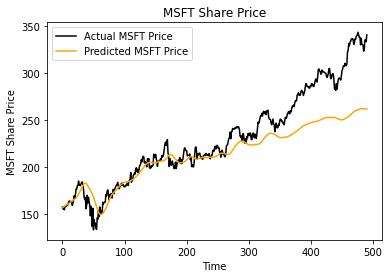

Epoch 1/25
61/61 [==============================] - 5s 17ms/step - loss: 0.0358
Epoch 2/25
61/61 [==============================] - 1s 17ms/step - loss: 0.0061
Epoch 3/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0052
Epoch 4/25
61/61 [==============================] - 1s 17ms/step - loss: 0.0065
Epoch 5/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0065
Epoch 6/25
61/61 [==============================] - 1s 19ms/step - loss: 0.0047
Epoch 7/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0045
Epoch 8/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0047
Epoch 9/25
61/61 [==============================] - 1s 17ms/step - loss: 0.0048
Epoch 10/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0050
Epoch 11/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0048
Epoch 12/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0051
Epoch 13/25
61/61 [==================

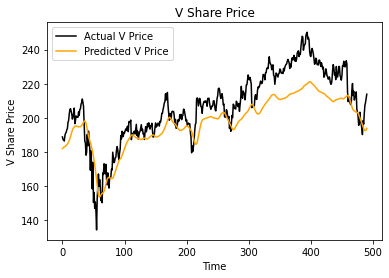

Epoch 1/25
31/31 [==============================] - 5s 25ms/step - loss: 0.0464
Epoch 2/25
31/31 [==============================] - 1s 28ms/step - loss: 0.0067
Epoch 3/25
31/31 [==============================] - 1s 26ms/step - loss: 0.0055
Epoch 4/25
31/31 [==============================] - 1s 28ms/step - loss: 0.0051
Epoch 5/25
31/31 [==============================] - 1s 27ms/step - loss: 0.0053
Epoch 6/25
31/31 [==============================] - 1s 27ms/step - loss: 0.0051
Epoch 7/25
31/31 [==============================] - 1s 28ms/step - loss: 0.0043
Epoch 8/25
31/31 [==============================] - 1s 27ms/step - loss: 0.0044
Epoch 9/25
31/31 [==============================] - 1s 27ms/step - loss: 0.0044
Epoch 10/25
31/31 [==============================] - 1s 26ms/step - loss: 0.0053
Epoch 11/25
31/31 [==============================] - 1s 26ms/step - loss: 0.0046
Epoch 12/25
31/31 [==============================] - 1s 27ms/step - loss: 0.0044
Epoch 13/25
31/31 [==================

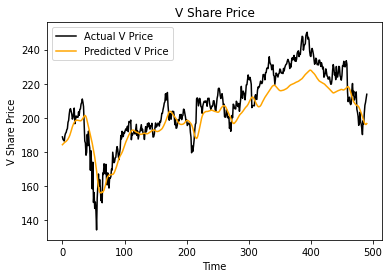

Epoch 1/25
21/21 [==============================] - 6s 29ms/step - loss: 0.0942
Epoch 2/25
21/21 [==============================] - 1s 28ms/step - loss: 0.0136
Epoch 3/25
21/21 [==============================] - 1s 28ms/step - loss: 0.0061
Epoch 4/25
21/21 [==============================] - 1s 29ms/step - loss: 0.0052
Epoch 5/25
21/21 [==============================] - 1s 30ms/step - loss: 0.0055
Epoch 6/25
21/21 [==============================] - 1s 30ms/step - loss: 0.0052
Epoch 7/25
21/21 [==============================] - 1s 30ms/step - loss: 0.0051
Epoch 8/25
21/21 [==============================] - 1s 30ms/step - loss: 0.0048
Epoch 9/25
21/21 [==============================] - 1s 29ms/step - loss: 0.0046
Epoch 10/25
21/21 [==============================] - 1s 29ms/step - loss: 0.0045
Epoch 11/25
21/21 [==============================] - 1s 29ms/step - loss: 0.0045
Epoch 12/25
21/21 [==============================] - 1s 29ms/step - loss: 0.0046
Epoch 13/25
21/21 [==================

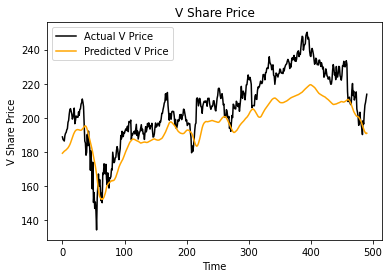

Epoch 1/25
16/16 [==============================] - 5s 31ms/step - loss: 0.1030
Epoch 2/25
16/16 [==============================] - 1s 32ms/step - loss: 0.0220
Epoch 3/25
16/16 [==============================] - 1s 32ms/step - loss: 0.0090
Epoch 4/25
16/16 [==============================] - 0s 31ms/step - loss: 0.0052
Epoch 5/25
16/16 [==============================] - 0s 30ms/step - loss: 0.0050
Epoch 6/25
16/16 [==============================] - 0s 31ms/step - loss: 0.0048
Epoch 7/25
16/16 [==============================] - 1s 31ms/step - loss: 0.0042
Epoch 8/25
16/16 [==============================] - 1s 31ms/step - loss: 0.0045
Epoch 9/25
16/16 [==============================] - 1s 31ms/step - loss: 0.0040
Epoch 10/25
16/16 [==============================] - 1s 32ms/step - loss: 0.0042
Epoch 11/25
16/16 [==============================] - 0s 31ms/step - loss: 0.0045
Epoch 12/25
16/16 [==============================] - 0s 31ms/step - loss: 0.0043
Epoch 13/25
16/16 [==================

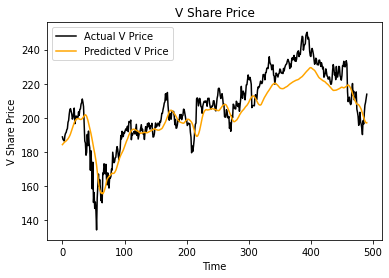

Epoch 1/25
60/60 [==============================] - 7s 41ms/step - loss: 0.0265
Epoch 2/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0058
Epoch 3/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0054
Epoch 4/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0050
Epoch 5/25
60/60 [==============================] - 2s 42ms/step - loss: 0.0054
Epoch 6/25
60/60 [==============================] - 3s 41ms/step - loss: 0.0062
Epoch 7/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0051
Epoch 8/25
60/60 [==============================] - 3s 42ms/step - loss: 0.0044
Epoch 9/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0041
Epoch 10/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0048
Epoch 11/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0051
Epoch 12/25
60/60 [==============================] - 2s 41ms/step - loss: 0.0047
Epoch 13/25
60/60 [==================

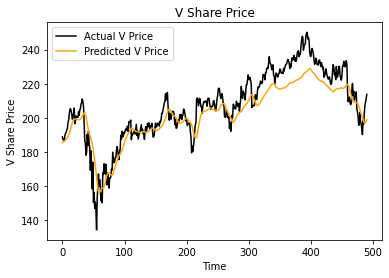

Epoch 1/25
30/30 [==============================] - 7s 48ms/step - loss: 0.0396
Epoch 2/25
30/30 [==============================] - 1s 47ms/step - loss: 0.0057
Epoch 3/25
30/30 [==============================] - 1s 46ms/step - loss: 0.0056
Epoch 4/25
30/30 [==============================] - 1s 45ms/step - loss: 0.0049
Epoch 5/25
30/30 [==============================] - 1s 47ms/step - loss: 0.0050
Epoch 6/25
30/30 [==============================] - 1s 48ms/step - loss: 0.0057
Epoch 7/25
30/30 [==============================] - 1s 45ms/step - loss: 0.0059
Epoch 8/25
30/30 [==============================] - 1s 45ms/step - loss: 0.0050
Epoch 9/25
30/30 [==============================] - 1s 47ms/step - loss: 0.0045
Epoch 10/25
30/30 [==============================] - 1s 45ms/step - loss: 0.0039
Epoch 11/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0040
Epoch 12/25
30/30 [==============================] - 1s 46ms/step - loss: 0.0048
Epoch 13/25
30/30 [==================

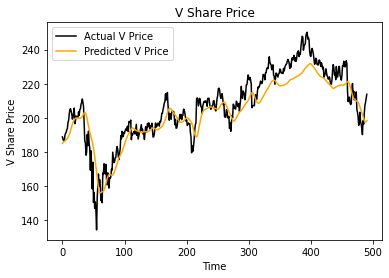

Epoch 1/25
20/20 [==============================] - 6s 51ms/step - loss: 0.0530
Epoch 2/25
20/20 [==============================] - 1s 51ms/step - loss: 0.0081
Epoch 3/25
20/20 [==============================] - 1s 52ms/step - loss: 0.0061
Epoch 4/25
20/20 [==============================] - 1s 51ms/step - loss: 0.0058
Epoch 5/25
20/20 [==============================] - 1s 49ms/step - loss: 0.0059
Epoch 6/25
20/20 [==============================] - 1s 53ms/step - loss: 0.0058
Epoch 7/25
20/20 [==============================] - 1s 52ms/step - loss: 0.0063
Epoch 8/25
20/20 [==============================] - 1s 53ms/step - loss: 0.0050
Epoch 9/25
20/20 [==============================] - 1s 52ms/step - loss: 0.0060
Epoch 10/25
20/20 [==============================] - 1s 53ms/step - loss: 0.0044
Epoch 11/25
20/20 [==============================] - 1s 50ms/step - loss: 0.0042
Epoch 12/25
20/20 [==============================] - 1s 53ms/step - loss: 0.0046
Epoch 13/25
20/20 [==================

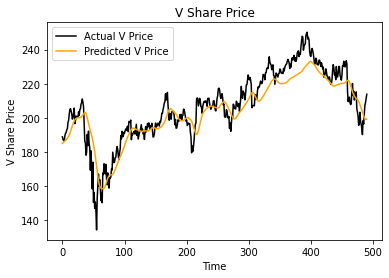

Epoch 1/25
15/15 [==============================] - 7s 59ms/step - loss: 0.0718
Epoch 2/25
15/15 [==============================] - 1s 59ms/step - loss: 0.0147
Epoch 3/25
15/15 [==============================] - 1s 59ms/step - loss: 0.0077
Epoch 4/25
15/15 [==============================] - 1s 57ms/step - loss: 0.0060
Epoch 5/25
15/15 [==============================] - 1s 59ms/step - loss: 0.0060
Epoch 6/25
15/15 [==============================] - 1s 59ms/step - loss: 0.0058
Epoch 7/25
15/15 [==============================] - 1s 58ms/step - loss: 0.0056
Epoch 8/25
15/15 [==============================] - 1s 57ms/step - loss: 0.0049
Epoch 9/25
15/15 [==============================] - 1s 59ms/step - loss: 0.0057
Epoch 10/25
15/15 [==============================] - 1s 58ms/step - loss: 0.0053
Epoch 11/25
15/15 [==============================] - 1s 57ms/step - loss: 0.0046
Epoch 12/25
15/15 [==============================] - 1s 58ms/step - loss: 0.0041
Epoch 13/25
15/15 [==================

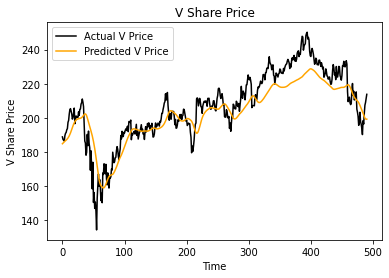

Epoch 1/25
58/58 [==============================] - 8s 63ms/step - loss: 0.0311
Epoch 2/25
58/58 [==============================] - 4s 64ms/step - loss: 0.0050
Epoch 3/25
58/58 [==============================] - 4s 62ms/step - loss: 0.0055
Epoch 4/25
58/58 [==============================] - 4s 64ms/step - loss: 0.0062
Epoch 5/25
58/58 [==============================] - 4s 63ms/step - loss: 0.0052
Epoch 6/25
58/58 [==============================] - 4s 65ms/step - loss: 0.0044
Epoch 7/25
58/58 [==============================] - 4s 64ms/step - loss: 0.0058
Epoch 8/25
58/58 [==============================] - 4s 65ms/step - loss: 0.0050
Epoch 9/25
58/58 [==============================] - 4s 65ms/step - loss: 0.0044
Epoch 10/25
58/58 [==============================] - 4s 65ms/step - loss: 0.0041
Epoch 11/25
58/58 [==============================] - 4s 65ms/step - loss: 0.0047
Epoch 12/25
58/58 [==============================] - 4s 64ms/step - loss: 0.0045
Epoch 13/25
58/58 [==================

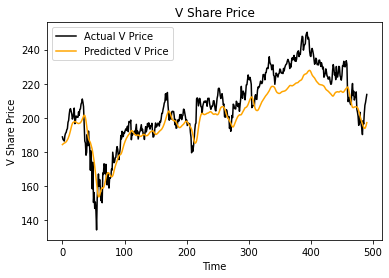

Epoch 1/25
29/29 [==============================] - 8s 70ms/step - loss: 0.0613
Epoch 2/25
29/29 [==============================] - 2s 70ms/step - loss: 0.0077
Epoch 3/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0060
Epoch 4/25
29/29 [==============================] - 2s 70ms/step - loss: 0.0055
Epoch 5/25
29/29 [==============================] - 2s 70ms/step - loss: 0.0051
Epoch 6/25
29/29 [==============================] - 2s 70ms/step - loss: 0.0057
Epoch 7/25
29/29 [==============================] - 2s 70ms/step - loss: 0.0052
Epoch 8/25
29/29 [==============================] - 2s 70ms/step - loss: 0.0048
Epoch 9/25
29/29 [==============================] - 2s 68ms/step - loss: 0.0047
Epoch 10/25
29/29 [==============================] - 2s 70ms/step - loss: 0.0048
Epoch 11/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0058
Epoch 12/25
29/29 [==============================] - 2s 70ms/step - loss: 0.0044
Epoch 13/25
29/29 [==================

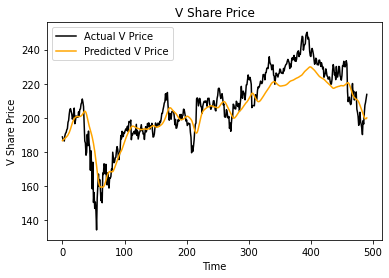

Epoch 1/25
20/20 [==============================] - 7s 73ms/step - loss: 0.0623
Epoch 2/25
20/20 [==============================] - 2s 76ms/step - loss: 0.0107
Epoch 3/25
20/20 [==============================] - 2s 75ms/step - loss: 0.0069
Epoch 4/25
20/20 [==============================] - 2s 74ms/step - loss: 0.0066
Epoch 5/25
20/20 [==============================] - 1s 74ms/step - loss: 0.0056
Epoch 6/25
20/20 [==============================] - 1s 73ms/step - loss: 0.0058
Epoch 7/25
20/20 [==============================] - 1s 71ms/step - loss: 0.0055
Epoch 8/25
20/20 [==============================] - 1s 74ms/step - loss: 0.0061
Epoch 9/25
20/20 [==============================] - 2s 75ms/step - loss: 0.0054
Epoch 10/25
20/20 [==============================] - 1s 74ms/step - loss: 0.0058
Epoch 11/25
20/20 [==============================] - 2s 75ms/step - loss: 0.0059
Epoch 12/25
20/20 [==============================] - 1s 72ms/step - loss: 0.0059
Epoch 13/25
20/20 [==================

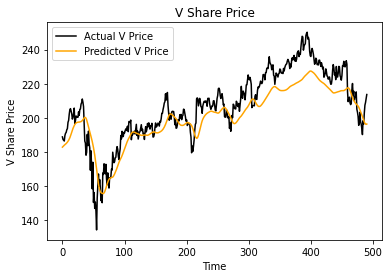

Epoch 1/25
15/15 [==============================] - 6s 80ms/step - loss: 0.0691
Epoch 2/25
15/15 [==============================] - 1s 79ms/step - loss: 0.0112
Epoch 3/25
15/15 [==============================] - 1s 79ms/step - loss: 0.0063
Epoch 4/25
15/15 [==============================] - 1s 76ms/step - loss: 0.0058
Epoch 5/25
15/15 [==============================] - 1s 79ms/step - loss: 0.0060
Epoch 6/25
15/15 [==============================] - 1s 80ms/step - loss: 0.0061
Epoch 7/25
15/15 [==============================] - 1s 81ms/step - loss: 0.0050
Epoch 8/25
15/15 [==============================] - 1s 79ms/step - loss: 0.0047
Epoch 9/25
15/15 [==============================] - 1s 80ms/step - loss: 0.0049
Epoch 10/25
15/15 [==============================] - 1s 80ms/step - loss: 0.0056
Epoch 11/25
15/15 [==============================] - 1s 80ms/step - loss: 0.0048
Epoch 12/25
15/15 [==============================] - 1s 80ms/step - loss: 0.0057
Epoch 13/25
15/15 [==================

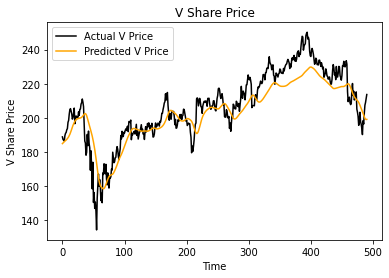

Epoch 1/25
61/61 [==============================] - 6s 20ms/step - loss: 0.0246
Epoch 2/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0083
Epoch 3/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0073
Epoch 4/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0078
Epoch 5/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0069
Epoch 6/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0063
Epoch 7/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0062
Epoch 8/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0073
Epoch 9/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0052
Epoch 10/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0055
Epoch 11/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0047
Epoch 12/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0049
Epoch 13/25
61/61 [==================

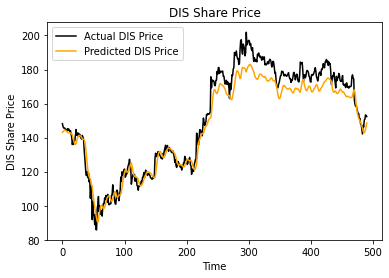

Epoch 1/25
31/31 [==============================] - 6s 28ms/step - loss: 0.0518
Epoch 2/25
31/31 [==============================] - 1s 30ms/step - loss: 0.0090
Epoch 3/25
31/31 [==============================] - 1s 29ms/step - loss: 0.0084
Epoch 4/25
31/31 [==============================] - 1s 30ms/step - loss: 0.0070
Epoch 5/25
31/31 [==============================] - 1s 30ms/step - loss: 0.0068
Epoch 6/25
31/31 [==============================] - 1s 29ms/step - loss: 0.0073
Epoch 7/25
31/31 [==============================] - 1s 30ms/step - loss: 0.0064
Epoch 8/25
31/31 [==============================] - 1s 29ms/step - loss: 0.0073
Epoch 9/25
31/31 [==============================] - 1s 29ms/step - loss: 0.0060
Epoch 10/25
31/31 [==============================] - 1s 28ms/step - loss: 0.0066
Epoch 11/25
31/31 [==============================] - 1s 30ms/step - loss: 0.0059
Epoch 12/25
31/31 [==============================] - 1s 30ms/step - loss: 0.0056
Epoch 13/25
31/31 [==================

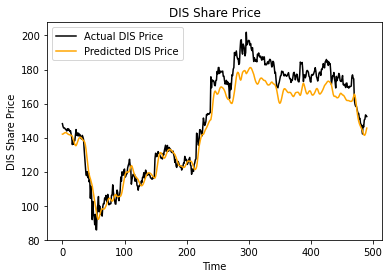

Epoch 1/25
21/21 [==============================] - 6s 31ms/step - loss: 0.0524
Epoch 2/25
21/21 [==============================] - 1s 31ms/step - loss: 0.0117
Epoch 3/25
21/21 [==============================] - 1s 31ms/step - loss: 0.0077
Epoch 4/25
21/21 [==============================] - 1s 32ms/step - loss: 0.0080
Epoch 5/25
21/21 [==============================] - 1s 31ms/step - loss: 0.0087
Epoch 6/25
21/21 [==============================] - 1s 32ms/step - loss: 0.0075
Epoch 7/25
21/21 [==============================] - 1s 31ms/step - loss: 0.0072
Epoch 8/25
21/21 [==============================] - 1s 31ms/step - loss: 0.0075
Epoch 9/25
21/21 [==============================] - 1s 32ms/step - loss: 0.0071
Epoch 10/25
21/21 [==============================] - 1s 31ms/step - loss: 0.0067
Epoch 11/25
21/21 [==============================] - 1s 32ms/step - loss: 0.0061
Epoch 12/25
21/21 [==============================] - 1s 32ms/step - loss: 0.0068
Epoch 13/25
21/21 [==================

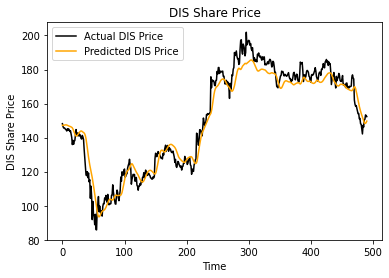

Epoch 1/25
16/16 [==============================] - 5s 33ms/step - loss: 0.0748
Epoch 2/25
16/16 [==============================] - 1s 34ms/step - loss: 0.0201
Epoch 3/25
16/16 [==============================] - 1s 31ms/step - loss: 0.0094
Epoch 4/25
16/16 [==============================] - 1s 32ms/step - loss: 0.0082
Epoch 5/25
16/16 [==============================] - 1s 35ms/step - loss: 0.0077
Epoch 6/25
16/16 [==============================] - 1s 33ms/step - loss: 0.0078
Epoch 7/25
16/16 [==============================] - 1s 32ms/step - loss: 0.0075
Epoch 8/25
16/16 [==============================] - 1s 33ms/step - loss: 0.0065
Epoch 9/25
16/16 [==============================] - 1s 32ms/step - loss: 0.0068
Epoch 10/25
16/16 [==============================] - 1s 33ms/step - loss: 0.0066
Epoch 11/25
16/16 [==============================] - 1s 31ms/step - loss: 0.0074
Epoch 12/25
16/16 [==============================] - 1s 33ms/step - loss: 0.0069
Epoch 13/25
16/16 [==================

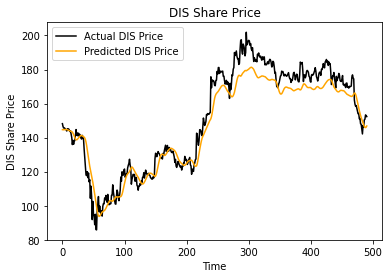

Epoch 1/25
60/60 [==============================] - 8s 45ms/step - loss: 0.0284
Epoch 2/25
60/60 [==============================] - 3s 43ms/step - loss: 0.0104
Epoch 3/25
60/60 [==============================] - 3s 45ms/step - loss: 0.0077
Epoch 4/25
60/60 [==============================] - 3s 44ms/step - loss: 0.0076
Epoch 5/25
60/60 [==============================] - 3s 45ms/step - loss: 0.0078
Epoch 6/25
60/60 [==============================] - 3s 46ms/step - loss: 0.0068
Epoch 7/25
60/60 [==============================] - 3s 44ms/step - loss: 0.0060
Epoch 8/25
60/60 [==============================] - 3s 44ms/step - loss: 0.0067
Epoch 9/25
60/60 [==============================] - 3s 46ms/step - loss: 0.0055
Epoch 10/25
60/60 [==============================] - 3s 43ms/step - loss: 0.0061
Epoch 11/25
60/60 [==============================] - 3s 46ms/step - loss: 0.0054
Epoch 12/25
60/60 [==============================] - 3s 46ms/step - loss: 0.0052
Epoch 13/25
60/60 [==================

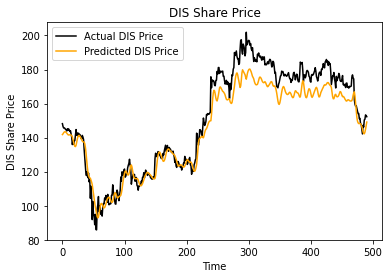

Epoch 1/25
30/30 [==============================] - 7s 51ms/step - loss: 0.0474
Epoch 2/25
30/30 [==============================] - 2s 52ms/step - loss: 0.0097
Epoch 3/25
30/30 [==============================] - 2s 53ms/step - loss: 0.0087
Epoch 4/25
30/30 [==============================] - 2s 51ms/step - loss: 0.0084
Epoch 5/25
30/30 [==============================] - 2s 52ms/step - loss: 0.0080
Epoch 6/25
30/30 [==============================] - 2s 52ms/step - loss: 0.0072
Epoch 7/25
30/30 [==============================] - 2s 51ms/step - loss: 0.0057
Epoch 8/25
30/30 [==============================] - 2s 50ms/step - loss: 0.0063
Epoch 9/25
30/30 [==============================] - 1s 49ms/step - loss: 0.0059
Epoch 10/25
30/30 [==============================] - 2s 51ms/step - loss: 0.0061
Epoch 11/25
30/30 [==============================] - 2s 52ms/step - loss: 0.0055
Epoch 12/25
30/30 [==============================] - 2s 53ms/step - loss: 0.0060
Epoch 13/25
30/30 [==================

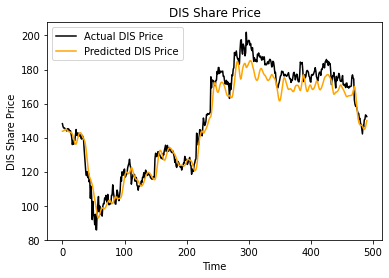

Epoch 1/25
20/20 [==============================] - 6s 55ms/step - loss: 0.0571
Epoch 2/25
20/20 [==============================] - 1s 58ms/step - loss: 0.0103
Epoch 3/25
20/20 [==============================] - 1s 56ms/step - loss: 0.0082
Epoch 4/25
20/20 [==============================] - 1s 58ms/step - loss: 0.0088
Epoch 5/25
20/20 [==============================] - 1s 57ms/step - loss: 0.0088
Epoch 6/25
20/20 [==============================] - 1s 56ms/step - loss: 0.0084
Epoch 7/25
20/20 [==============================] - 1s 58ms/step - loss: 0.0076
Epoch 8/25
20/20 [==============================] - 1s 55ms/step - loss: 0.0079
Epoch 9/25
20/20 [==============================] - 1s 56ms/step - loss: 0.0070
Epoch 10/25
20/20 [==============================] - 1s 56ms/step - loss: 0.0060
Epoch 11/25
20/20 [==============================] - 1s 58ms/step - loss: 0.0066
Epoch 12/25
20/20 [==============================] - 1s 56ms/step - loss: 0.0057
Epoch 13/25
20/20 [==================

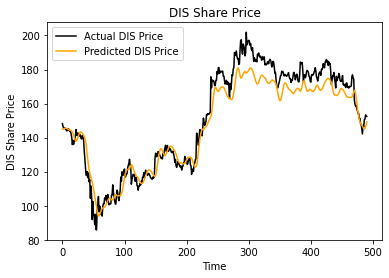

Epoch 1/25
15/15 [==============================] - 7s 61ms/step - loss: 0.0717
Epoch 2/25
15/15 [==============================] - 1s 61ms/step - loss: 0.0167
Epoch 3/25
15/15 [==============================] - 1s 61ms/step - loss: 0.0109
Epoch 4/25
15/15 [==============================] - 1s 59ms/step - loss: 0.0097
Epoch 5/25
15/15 [==============================] - 1s 61ms/step - loss: 0.0095
Epoch 6/25
15/15 [==============================] - 1s 60ms/step - loss: 0.0078
Epoch 7/25
15/15 [==============================] - 1s 61ms/step - loss: 0.0078
Epoch 8/25
15/15 [==============================] - 1s 59ms/step - loss: 0.0076
Epoch 9/25
15/15 [==============================] - 1s 60ms/step - loss: 0.0073
Epoch 10/25
15/15 [==============================] - 1s 62ms/step - loss: 0.0077
Epoch 11/25
15/15 [==============================] - 1s 62ms/step - loss: 0.0069
Epoch 12/25
15/15 [==============================] - 1s 61ms/step - loss: 0.0064
Epoch 13/25
15/15 [==================

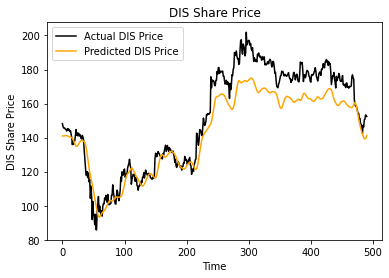

Epoch 1/25
58/58 [==============================] - 9s 67ms/step - loss: 0.0287
Epoch 2/25
58/58 [==============================] - 4s 65ms/step - loss: 0.0100
Epoch 3/25
58/58 [==============================] - 4s 65ms/step - loss: 0.0079
Epoch 4/25
58/58 [==============================] - 4s 65ms/step - loss: 0.0083
Epoch 5/25
58/58 [==============================] - 4s 66ms/step - loss: 0.0074
Epoch 6/25
58/58 [==============================] - 4s 64ms/step - loss: 0.0058
Epoch 7/25
58/58 [==============================] - 4s 66ms/step - loss: 0.0066
Epoch 8/25
58/58 [==============================] - 4s 66ms/step - loss: 0.0057
Epoch 9/25
58/58 [==============================] - 4s 65ms/step - loss: 0.0057
Epoch 10/25
58/58 [==============================] - 4s 66ms/step - loss: 0.0058
Epoch 11/25
58/58 [==============================] - 4s 66ms/step - loss: 0.0050
Epoch 12/25
58/58 [==============================] - 4s 66ms/step - loss: 0.0049
Epoch 13/25
58/58 [==================

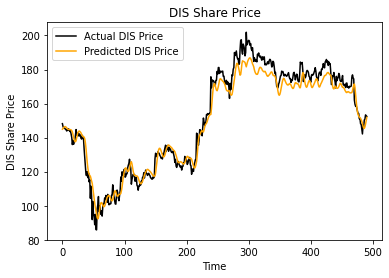

Epoch 1/25
29/29 [==============================] - 8s 69ms/step - loss: 0.0373
Epoch 2/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0095
Epoch 3/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0083
Epoch 4/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0078
Epoch 5/25
29/29 [==============================] - 2s 73ms/step - loss: 0.0076
Epoch 6/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0082
Epoch 7/25
29/29 [==============================] - 2s 73ms/step - loss: 0.0078
Epoch 8/25
29/29 [==============================] - 2s 72ms/step - loss: 0.0068
Epoch 9/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0061
Epoch 10/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0054
Epoch 11/25
29/29 [==============================] - 2s 70ms/step - loss: 0.0058
Epoch 12/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0048
Epoch 13/25
29/29 [==================

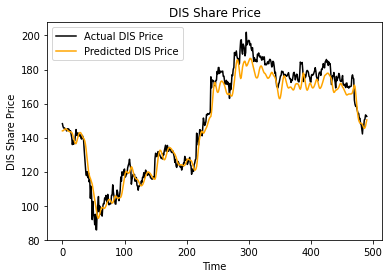

Epoch 1/25
20/20 [==============================] - 7s 76ms/step - loss: 0.0399
Epoch 2/25
20/20 [==============================] - 1s 74ms/step - loss: 0.0111
Epoch 3/25
20/20 [==============================] - 2s 75ms/step - loss: 0.0094
Epoch 4/25
20/20 [==============================] - 2s 74ms/step - loss: 0.0088
Epoch 5/25
20/20 [==============================] - 2s 75ms/step - loss: 0.0088
Epoch 6/25
20/20 [==============================] - 1s 73ms/step - loss: 0.0077
Epoch 7/25
20/20 [==============================] - 2s 77ms/step - loss: 0.0079
Epoch 8/25
20/20 [==============================] - 2s 77ms/step - loss: 0.0072
Epoch 9/25
20/20 [==============================] - 2s 77ms/step - loss: 0.0069
Epoch 10/25
20/20 [==============================] - 2s 78ms/step - loss: 0.0068
Epoch 11/25
20/20 [==============================] - 2s 77ms/step - loss: 0.0063
Epoch 12/25
20/20 [==============================] - 2s 75ms/step - loss: 0.0065
Epoch 13/25
20/20 [==================

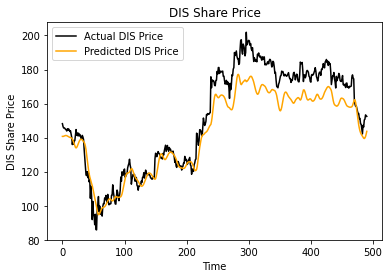

Epoch 1/25
15/15 [==============================] - 6s 83ms/step - loss: 0.0728
Epoch 2/25
15/15 [==============================] - 1s 81ms/step - loss: 0.0152
Epoch 3/25
15/15 [==============================] - 1s 82ms/step - loss: 0.0108
Epoch 4/25
15/15 [==============================] - 1s 81ms/step - loss: 0.0089
Epoch 5/25
15/15 [==============================] - 1s 83ms/step - loss: 0.0082
Epoch 6/25
15/15 [==============================] - 1s 82ms/step - loss: 0.0080
Epoch 7/25
15/15 [==============================] - 1s 80ms/step - loss: 0.0075
Epoch 8/25
15/15 [==============================] - 1s 79ms/step - loss: 0.0075
Epoch 9/25
15/15 [==============================] - 1s 81ms/step - loss: 0.0071
Epoch 10/25
15/15 [==============================] - 1s 81ms/step - loss: 0.0070
Epoch 11/25
15/15 [==============================] - 1s 79ms/step - loss: 0.0072
Epoch 12/25
15/15 [==============================] - 1s 82ms/step - loss: 0.0065
Epoch 13/25
15/15 [==================

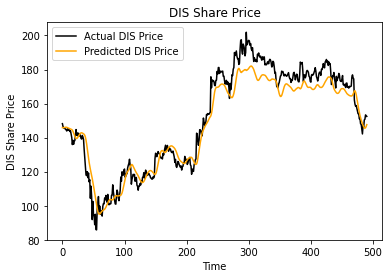

Epoch 1/25
61/61 [==============================] - 6s 21ms/step - loss: 0.0353
Epoch 2/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0101
Epoch 3/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0106
Epoch 4/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0099
Epoch 5/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0094
Epoch 6/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0085
Epoch 7/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0082
Epoch 8/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0076
Epoch 9/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0074
Epoch 10/25
61/61 [==============================] - 1s 20ms/step - loss: 0.0070
Epoch 11/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0073
Epoch 12/25
61/61 [==============================] - 1s 21ms/step - loss: 0.0070
Epoch 13/25
61/61 [==================

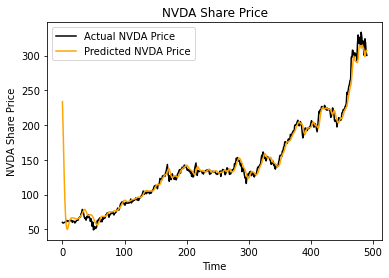

Epoch 1/25
31/31 [==============================] - 6s 30ms/step - loss: 0.0361
Epoch 2/25
31/31 [==============================] - 1s 31ms/step - loss: 0.0116
Epoch 3/25
31/31 [==============================] - 1s 32ms/step - loss: 0.0114
Epoch 4/25
31/31 [==============================] - 1s 31ms/step - loss: 0.0099
Epoch 5/25
31/31 [==============================] - 1s 30ms/step - loss: 0.0095
Epoch 6/25
31/31 [==============================] - 1s 31ms/step - loss: 0.0104
Epoch 7/25
31/31 [==============================] - 1s 31ms/step - loss: 0.0087
Epoch 8/25
31/31 [==============================] - 1s 31ms/step - loss: 0.0094
Epoch 9/25
31/31 [==============================] - 1s 31ms/step - loss: 0.0091
Epoch 10/25
31/31 [==============================] - 1s 31ms/step - loss: 0.0087
Epoch 11/25
31/31 [==============================] - 1s 30ms/step - loss: 0.0109
Epoch 12/25
31/31 [==============================] - 1s 30ms/step - loss: 0.0086
Epoch 13/25
31/31 [==================

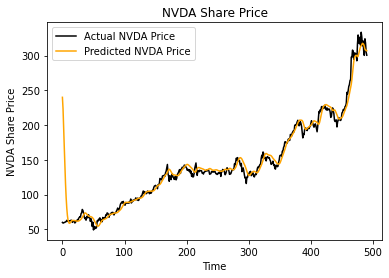

Epoch 1/25
21/21 [==============================] - 6s 33ms/step - loss: 0.0877
Epoch 2/25
21/21 [==============================] - 1s 33ms/step - loss: 0.0187
Epoch 3/25
21/21 [==============================] - 1s 33ms/step - loss: 0.0124
Epoch 4/25
21/21 [==============================] - 1s 33ms/step - loss: 0.0102
Epoch 5/25
21/21 [==============================] - 1s 33ms/step - loss: 0.0102
Epoch 6/25
21/21 [==============================] - 1s 34ms/step - loss: 0.0108
Epoch 7/25
21/21 [==============================] - 1s 31ms/step - loss: 0.0093
Epoch 8/25
21/21 [==============================] - 1s 33ms/step - loss: 0.0089
Epoch 9/25
21/21 [==============================] - 1s 33ms/step - loss: 0.0091
Epoch 10/25
21/21 [==============================] - 1s 33ms/step - loss: 0.0089
Epoch 11/25
21/21 [==============================] - 1s 32ms/step - loss: 0.0082
Epoch 12/25
21/21 [==============================] - 1s 33ms/step - loss: 0.0080
Epoch 13/25
21/21 [==================

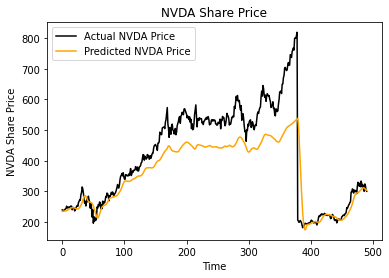

Epoch 1/25
16/16 [==============================] - 5s 34ms/step - loss: 0.1001
Epoch 2/25
16/16 [==============================] - 1s 34ms/step - loss: 0.0210
Epoch 3/25
16/16 [==============================] - 1s 35ms/step - loss: 0.0135
Epoch 4/25
16/16 [==============================] - 1s 34ms/step - loss: 0.0107
Epoch 5/25
16/16 [==============================] - 1s 35ms/step - loss: 0.0096
Epoch 6/25
16/16 [==============================] - 1s 34ms/step - loss: 0.0103
Epoch 7/25
16/16 [==============================] - 1s 34ms/step - loss: 0.0099
Epoch 8/25
16/16 [==============================] - 1s 33ms/step - loss: 0.0092
Epoch 9/25
16/16 [==============================] - 1s 34ms/step - loss: 0.0092
Epoch 10/25
16/16 [==============================] - 1s 35ms/step - loss: 0.0096
Epoch 11/25
16/16 [==============================] - 1s 35ms/step - loss: 0.0094
Epoch 12/25
16/16 [==============================] - 1s 35ms/step - loss: 0.0091
Epoch 13/25
16/16 [==================

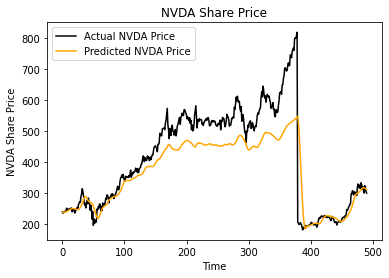

Epoch 1/25
60/60 [==============================] - 8s 50ms/step - loss: 0.0284
Epoch 2/25
60/60 [==============================] - 3s 51ms/step - loss: 0.0110
Epoch 3/25
60/60 [==============================] - 3s 50ms/step - loss: 0.0091
Epoch 4/25
60/60 [==============================] - 3s 50ms/step - loss: 0.0094
Epoch 5/25
60/60 [==============================] - 3s 49ms/step - loss: 0.0079
Epoch 6/25
60/60 [==============================] - 3s 48ms/step - loss: 0.0077
Epoch 7/25
60/60 [==============================] - 3s 51ms/step - loss: 0.0079
Epoch 8/25
60/60 [==============================] - 3s 48ms/step - loss: 0.0080
Epoch 9/25
60/60 [==============================] - 3s 49ms/step - loss: 0.0073
Epoch 10/25
60/60 [==============================] - 3s 49ms/step - loss: 0.0076
Epoch 11/25
60/60 [==============================] - 3s 47ms/step - loss: 0.0062
Epoch 12/25
60/60 [==============================] - 3s 48ms/step - loss: 0.0062
Epoch 13/25
60/60 [==================

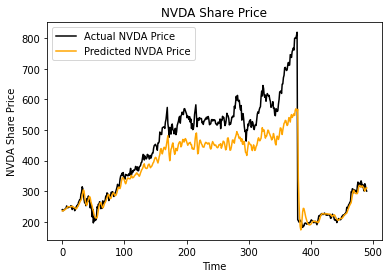

Epoch 1/25
30/30 [==============================] - 7s 56ms/step - loss: 0.0379
Epoch 2/25
30/30 [==============================] - 2s 55ms/step - loss: 0.0127
Epoch 3/25
30/30 [==============================] - 2s 56ms/step - loss: 0.0102
Epoch 4/25
30/30 [==============================] - 2s 54ms/step - loss: 0.0096
Epoch 5/25
30/30 [==============================] - 2s 55ms/step - loss: 0.0089
Epoch 6/25
30/30 [==============================] - 2s 55ms/step - loss: 0.0099
Epoch 7/25
30/30 [==============================] - 2s 55ms/step - loss: 0.0086
Epoch 8/25
30/30 [==============================] - 2s 54ms/step - loss: 0.0082
Epoch 9/25
30/30 [==============================] - 2s 55ms/step - loss: 0.0091
Epoch 10/25
30/30 [==============================] - 2s 53ms/step - loss: 0.0089
Epoch 11/25
30/30 [==============================] - 2s 54ms/step - loss: 0.0075
Epoch 12/25
30/30 [==============================] - 2s 55ms/step - loss: 0.0070
Epoch 13/25
30/30 [==================

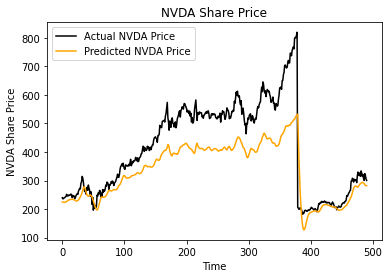

Epoch 1/25
20/20 [==============================] - 6s 58ms/step - loss: 0.1140
Epoch 2/25
20/20 [==============================] - 1s 60ms/step - loss: 0.0196
Epoch 3/25
20/20 [==============================] - 1s 59ms/step - loss: 0.0147
Epoch 4/25
20/20 [==============================] - 1s 59ms/step - loss: 0.0133
Epoch 5/25
20/20 [==============================] - 1s 58ms/step - loss: 0.0118
Epoch 6/25
20/20 [==============================] - 1s 59ms/step - loss: 0.0110
Epoch 7/25
20/20 [==============================] - 1s 59ms/step - loss: 0.0108
Epoch 8/25
20/20 [==============================] - 1s 58ms/step - loss: 0.0091
Epoch 9/25
20/20 [==============================] - 1s 59ms/step - loss: 0.0092
Epoch 10/25
20/20 [==============================] - 1s 57ms/step - loss: 0.0091
Epoch 11/25
20/20 [==============================] - 1s 59ms/step - loss: 0.0079
Epoch 12/25
20/20 [==============================] - 1s 57ms/step - loss: 0.0078
Epoch 13/25
20/20 [==================

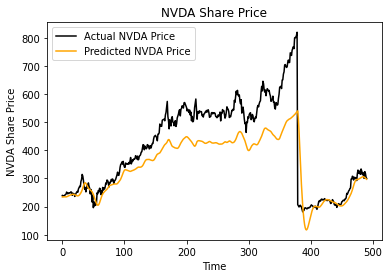

Epoch 1/25
15/15 [==============================] - 7s 63ms/step - loss: 0.0942
Epoch 2/25
15/15 [==============================] - 1s 62ms/step - loss: 0.0237
Epoch 3/25
15/15 [==============================] - 1s 65ms/step - loss: 0.0150
Epoch 4/25
15/15 [==============================] - 1s 64ms/step - loss: 0.0127
Epoch 5/25
15/15 [==============================] - 1s 66ms/step - loss: 0.0108
Epoch 6/25
15/15 [==============================] - 1s 62ms/step - loss: 0.0101
Epoch 7/25
15/15 [==============================] - 1s 63ms/step - loss: 0.0100
Epoch 8/25
15/15 [==============================] - 1s 63ms/step - loss: 0.0094
Epoch 9/25
15/15 [==============================] - 1s 63ms/step - loss: 0.0081
Epoch 10/25
15/15 [==============================] - 1s 64ms/step - loss: 0.0087
Epoch 11/25
15/15 [==============================] - 1s 64ms/step - loss: 0.0090
Epoch 12/25
15/15 [==============================] - 1s 63ms/step - loss: 0.0073
Epoch 13/25
15/15 [==================

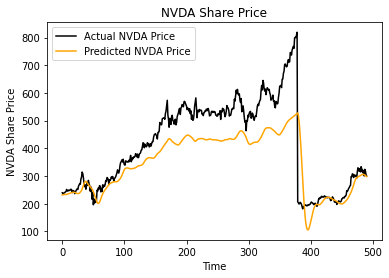

Epoch 1/25
58/58 [==============================] - 9s 66ms/step - loss: 0.0319
Epoch 2/25
58/58 [==============================] - 4s 65ms/step - loss: 0.0104
Epoch 3/25
58/58 [==============================] - 4s 64ms/step - loss: 0.0101
Epoch 4/25
58/58 [==============================] - 4s 67ms/step - loss: 0.0092
Epoch 5/25
58/58 [==============================] - 4s 67ms/step - loss: 0.0085
Epoch 6/25
58/58 [==============================] - 4s 68ms/step - loss: 0.0091
Epoch 7/25
58/58 [==============================] - 4s 68ms/step - loss: 0.0075
Epoch 8/25
58/58 [==============================] - 4s 68ms/step - loss: 0.0068
Epoch 9/25
58/58 [==============================] - 4s 67ms/step - loss: 0.0079
Epoch 10/25
58/58 [==============================] - 4s 68ms/step - loss: 0.0066
Epoch 11/25
58/58 [==============================] - 4s 68ms/step - loss: 0.0085
Epoch 12/25
58/58 [==============================] - 4s 68ms/step - loss: 0.0062
Epoch 13/25
58/58 [==================

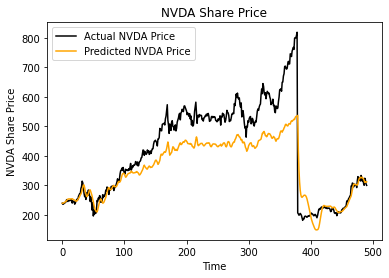

Epoch 1/25
29/29 [==============================] - 8s 74ms/step - loss: 0.0450
Epoch 2/25
29/29 [==============================] - 2s 72ms/step - loss: 0.0136
Epoch 3/25
29/29 [==============================] - 2s 73ms/step - loss: 0.0111
Epoch 4/25
29/29 [==============================] - 2s 75ms/step - loss: 0.0090
Epoch 5/25
29/29 [==============================] - 2s 73ms/step - loss: 0.0104
Epoch 6/25
29/29 [==============================] - 2s 73ms/step - loss: 0.0097
Epoch 7/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0092
Epoch 8/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0081
Epoch 9/25
29/29 [==============================] - 2s 72ms/step - loss: 0.0070
Epoch 10/25
29/29 [==============================] - 2s 71ms/step - loss: 0.0083
Epoch 11/25
29/29 [==============================] - 2s 72ms/step - loss: 0.0073
Epoch 12/25
29/29 [==============================] - 2s 74ms/step - loss: 0.0071
Epoch 13/25
29/29 [==================

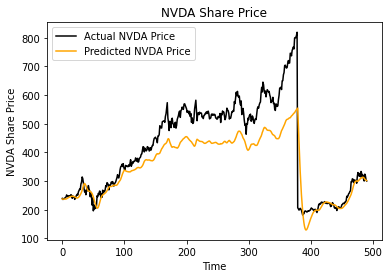

Epoch 1/25
20/20 [==============================] - 7s 78ms/step - loss: 0.0702
Epoch 2/25
20/20 [==============================] - 2s 78ms/step - loss: 0.0158
Epoch 3/25
20/20 [==============================] - 2s 79ms/step - loss: 0.0113
Epoch 4/25
20/20 [==============================] - 2s 78ms/step - loss: 0.0127
Epoch 5/25
20/20 [==============================] - 2s 78ms/step - loss: 0.0105
Epoch 6/25
20/20 [==============================] - 2s 79ms/step - loss: 0.0086
Epoch 7/25
20/20 [==============================] - 2s 77ms/step - loss: 0.0094
Epoch 8/25
20/20 [==============================] - 2s 77ms/step - loss: 0.0093
Epoch 9/25
20/20 [==============================] - 2s 77ms/step - loss: 0.0086
Epoch 10/25
20/20 [==============================] - 2s 76ms/step - loss: 0.0089
Epoch 11/25
20/20 [==============================] - 2s 77ms/step - loss: 0.0091
Epoch 12/25
20/20 [==============================] - 2s 78ms/step - loss: 0.0080
Epoch 13/25
20/20 [==================

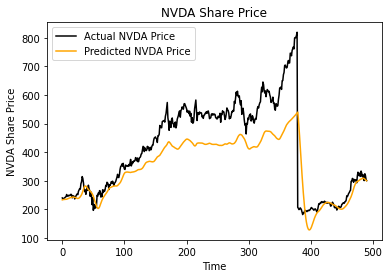

Epoch 1/25
15/15 [==============================] - 6s 82ms/step - loss: 0.0786
Epoch 2/25
15/15 [==============================] - 1s 84ms/step - loss: 0.0197
Epoch 3/25
15/15 [==============================] - 1s 83ms/step - loss: 0.0127
Epoch 4/25
15/15 [==============================] - 1s 84ms/step - loss: 0.0112
Epoch 5/25
15/15 [==============================] - 1s 81ms/step - loss: 0.0111
Epoch 6/25
15/15 [==============================] - 1s 84ms/step - loss: 0.0107
Epoch 7/25
15/15 [==============================] - 1s 82ms/step - loss: 0.0094
Epoch 8/25
15/15 [==============================] - 1s 84ms/step - loss: 0.0093
Epoch 9/25
15/15 [==============================] - 1s 84ms/step - loss: 0.0089
Epoch 10/25
15/15 [==============================] - 1s 84ms/step - loss: 0.0076
Epoch 11/25
15/15 [==============================] - 1s 83ms/step - loss: 0.0083
Epoch 12/25
15/15 [==============================] - 1s 84ms/step - loss: 0.0085
Epoch 13/25
15/15 [==================

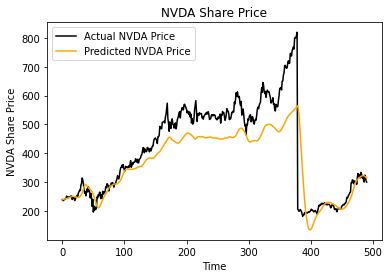

[[[21.1066484577521, 0.8464648875272202, 15, 8, 177.47999572753906, 173.64193725585938], [21.319827573552676, 0.8433488468556833, 15, 16, 177.5821075439453, 166.4574432373047], [24.938597744644607, 0.78565617950106, 15, 24, 177.56019592285156, 167.23309326171875], [27.486223080212216, 0.7396260033888141, 15, 32, 177.5399932861328, 168.9025421142578], [21.471744338784557, 0.8411084779002582, 30, 8, 177.5883026123047, 176.642578125], [23.422037492639056, 0.810933350766774, 30, 16, 177.60499572753906, 171.00929260253906], [26.5607532471478, 0.7568645185509684, 30, 24, 177.53500366210938, 170.87026977539062], [26.12683740545779, 0.7647445885732304, 30, 32, 177.59219360351562, 170.65953063964844], [20.371020016269803, 0.8569819107736014, 45, 8, 177.61000061035156, 173.21498107910156], [22.066380462165807, 0.8321857246511898, 45, 16, 177.56680297851562, 167.74806213378906], [25.34555182956773, 0.7786035416695742, 45, 24, 177.5500030517578, 170.69517517089844], [29.04446129948071, 0.709266384

In [16]:
p_days = [15, 30, 45]
batch = [8, 16, 24, 32]
lstm_result = []


for index, val in enumerate(train_data):
  curr_list = []
  for i in p_days:
    for j in batch:
      r1, r2, f, ap = stock_prediction_2(index, val, i, j)
      curr_list.append([r1, r2, i, j, ap, f])
  lstm_result.append(curr_list)

print(lstm_result)
# for index, val in enumerate(lstm_result):
#   print('TICKER: {}\tRMSE: {:.4f}\tR2: {:.4f}\tnum_of_days: {}\tbatch_size: {}\tlast actual: {:.5f}\tweekly prediction: {:.2f}\tprojected profit/stock: {:.2f}'.format(tickers[index],val[0], val[1], val[2], val[3], val[4], val[5], val[5]-val[4]))

Result of the grid search ordered in ascending order of the RMSE value

In [22]:
for index, val in enumerate(lstm_result):
  print(tickers[index] + ':')
  for j in (sorted(val, key=lambda x:x[0])):
    print(j)
  print()

AAPL:
[20.371020016269803, 0.8569819107736014, 45, 8, 177.61000061035156, 173.21498107910156]
[21.1066484577521, 0.8464648875272202, 15, 8, 177.47999572753906, 173.64193725585938]
[21.319827573552676, 0.8433488468556833, 15, 16, 177.5821075439453, 166.4574432373047]
[21.471744338784557, 0.8411084779002582, 30, 8, 177.5883026123047, 176.642578125]
[22.066380462165807, 0.8321857246511898, 45, 16, 177.56680297851562, 167.74806213378906]
[23.422037492639056, 0.810933350766774, 30, 16, 177.60499572753906, 171.00929260253906]
[24.938597744644607, 0.78565617950106, 15, 24, 177.56019592285156, 167.23309326171875]
[25.34555182956773, 0.7786035416695742, 45, 24, 177.5500030517578, 170.69517517089844]
[26.12683740545779, 0.7647445885732304, 30, 32, 177.59219360351562, 170.65953063964844]
[26.5607532471478, 0.7568645185509684, 30, 24, 177.53500366210938, 170.87026977539062]
[27.486223080212216, 0.7396260033888141, 15, 32, 177.5399932861328, 168.9025421142578]
[29.04446129948071, 0.7092663847452886

[20.371020016269803, 0.8569819107736014, 45, 8, 177.61000061035156, 173.21498107910156]
Epoch 1/25
58/58 [==============================] - 8s 57ms/step - loss: 0.0168
Epoch 2/25
58/58 [==============================] - 3s 56ms/step - loss: 0.0060
Epoch 3/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0056
Epoch 4/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0047
Epoch 5/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0040
Epoch 6/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0039
Epoch 7/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0033
Epoch 8/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0041
Epoch 9/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0032
Epoch 10/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0033
Epoch 11/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0033
Epoch 12/25
58/58 [===========

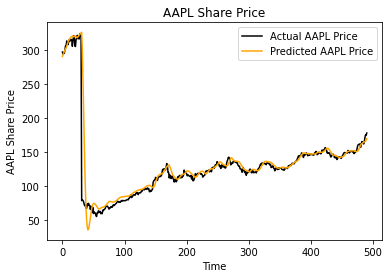

[27.181049095849858, 0.7697598153611631, 45, 8, 329.1099853515625, 297.0181884765625]
Epoch 1/25
58/58 [==============================] - 9s 58ms/step - loss: 0.0449
Epoch 2/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0155
Epoch 3/25
58/58 [==============================] - 3s 56ms/step - loss: 0.0131
Epoch 4/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0119
Epoch 5/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0106
Epoch 6/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0105
Epoch 7/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0106
Epoch 8/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0100
Epoch 9/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0090
Epoch 10/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0080
Epoch 11/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0082
Epoch 12/25
58/58 [=============

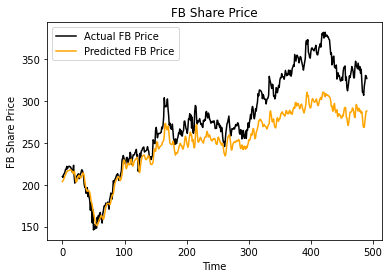

[23.514430520698006, 0.7811732383207344, 45, 16, 340.29998779296875, 276.0523376464844]
Epoch 1/25
29/29 [==============================] - 7s 63ms/step - loss: 0.0276
Epoch 2/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0059
Epoch 3/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0048
Epoch 4/25
29/29 [==============================] - 2s 64ms/step - loss: 0.0043
Epoch 5/25
29/29 [==============================] - 2s 64ms/step - loss: 0.0044
Epoch 6/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0038
Epoch 7/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0036
Epoch 8/25
29/29 [==============================] - 2s 64ms/step - loss: 0.0036
Epoch 9/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0033
Epoch 10/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0047
Epoch 11/25
29/29 [==============================] - 2s 63ms/step - loss: 0.0038
Epoch 12/25
29/29 [===========

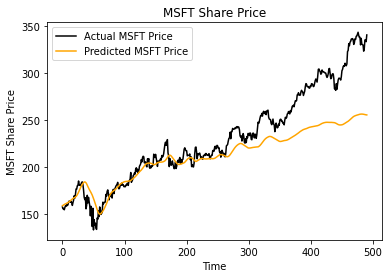

[8.93597037119555, 0.8128202142066077, 30, 16, 213.77999877929688, 199.3014373779297]
Epoch 1/25
30/30 [==============================] - 6s 42ms/step - loss: 0.0400
Epoch 2/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0058
Epoch 3/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0054
Epoch 4/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0048
Epoch 5/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0050
Epoch 6/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0058
Epoch 7/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0046
Epoch 8/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0047
Epoch 9/25
30/30 [==============================] - 1s 42ms/step - loss: 0.0058
Epoch 10/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0049
Epoch 11/25
30/30 [==============================] - 1s 43ms/step - loss: 0.0044
Epoch 12/25
30/30 [=============

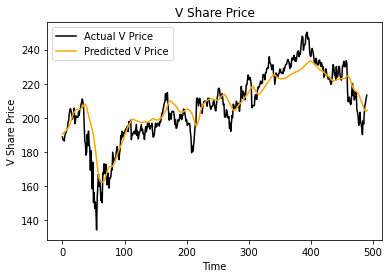

[5.98549331105728, 0.9596331565820013, 45, 8, 152.4499969482422, 153.15921020507812]
Epoch 1/25
58/58 [==============================] - 9s 58ms/step - loss: 0.0406
Epoch 2/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0088
Epoch 3/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0087
Epoch 4/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0079
Epoch 5/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0063
Epoch 6/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0066
Epoch 7/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0063
Epoch 8/25
58/58 [==============================] - 3s 58ms/step - loss: 0.0057
Epoch 9/25
58/58 [==============================] - 3s 59ms/step - loss: 0.0079
Epoch 10/25
58/58 [==============================] - 3s 57ms/step - loss: 0.0055
Epoch 11/25
58/58 [==============================] - 3s 56ms/step - loss: 0.0049
Epoch 12/25
58/58 [==============

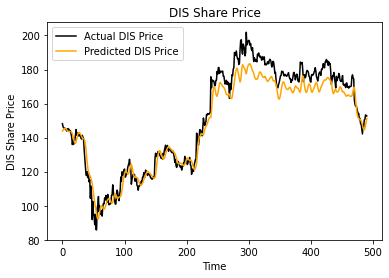

[13.243941721120065, 0.9558172006822035, 15, 8, 300.3699951171875, 302.2781982421875]
Epoch 1/25
61/61 [==============================] - 5s 16ms/step - loss: 0.0328
Epoch 2/25
61/61 [==============================] - 1s 17ms/step - loss: 0.0103
Epoch 3/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0110
Epoch 4/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0096
Epoch 5/25
61/61 [==============================] - 1s 17ms/step - loss: 0.0103
Epoch 6/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0088
Epoch 7/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0102
Epoch 8/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0077
Epoch 9/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0080
Epoch 10/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0066
Epoch 11/25
61/61 [==============================] - 1s 16ms/step - loss: 0.0072
Epoch 12/25
61/61 [=============

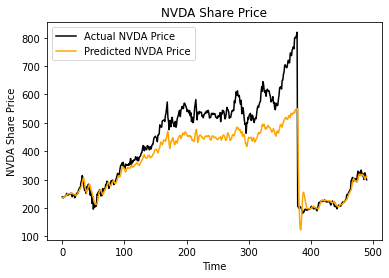

In [41]:
for index, val in enumerate(lstm_result):
  best = sorted(val, key=lambda x:x[0])[0]
  print(best)
  stock_prediction_2(index, train_data[index], best[2], best[3])